In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import SEACells
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Some plotting aesthetics
%matplotlib inline

sns.set_style('ticks')
matplotlib.rcParams['figure.figsize'] = [4, 4]
matplotlib.rcParams['figure.dpi'] = 100

findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


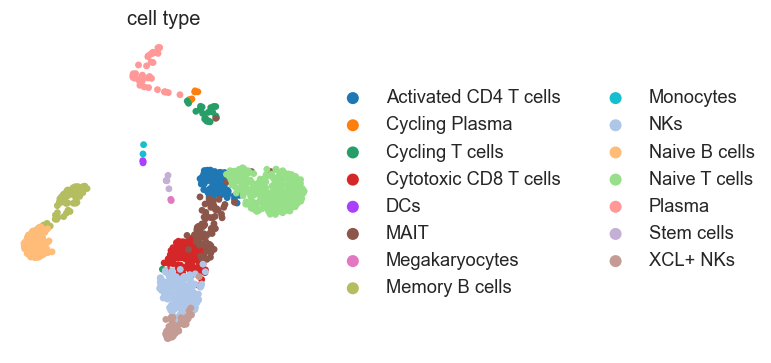

Welcome to SEACells!
Computing kNN graph using scanpy NN ...
Computing radius for adaptive bandwidth kernel...


  0%|          | 0/1240 [00:00<?, ?it/s]

Making graph symmetric...
Parameter graph_construction = union being used to build KNN graph...
Computing RBF kernel...


  0%|          | 0/1240 [00:00<?, ?it/s]

Building similarity LIL matrix...


  0%|          | 0/1240 [00:00<?, ?it/s]

Constructing CSR matrix...


/Users/kevinoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Building kernel on X_pca
Computing diffusion components from X_pca for waypoint initialization ... 
Determing nearest neighbor graph...
Done.
Sampling waypoints ...
Done.
Selecting 18 cells from waypoint initialization.
Initializing residual matrix using greedy column selection
Initializing f and g...


100%|█████████████████████████████████████████| 12/12 [00:00<00:00, 1501.14it/s]

Selecting 2 cells from greedy initialization.


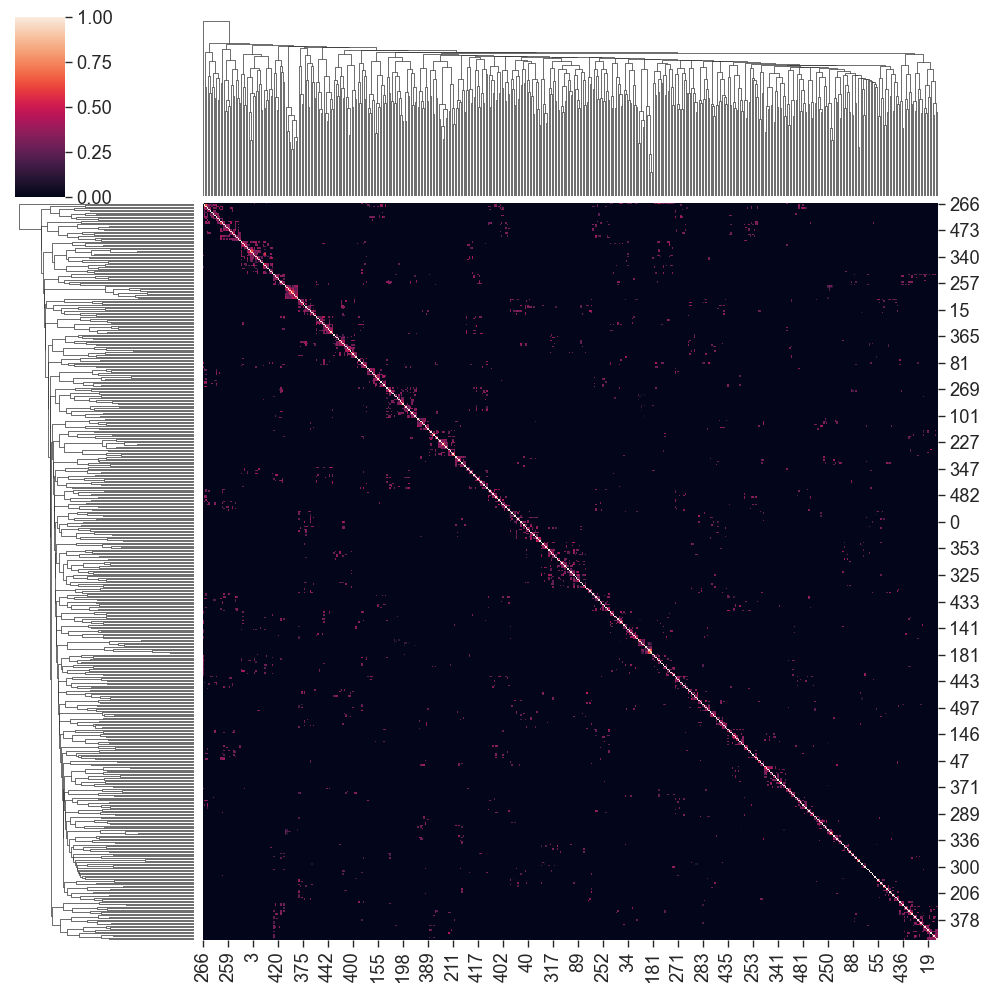

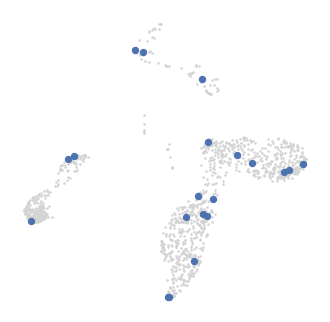

Randomly initialized A matrix.
Setting convergence threshold at 0.00062
Starting iteration 1.
Completed iteration 1.
Starting iteration 10.
Completed iteration 10.
Starting iteration 20.
Completed iteration 20.
Converged after 21 iterations.


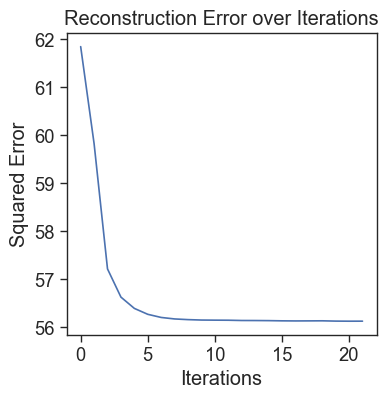

/Users/kevinoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


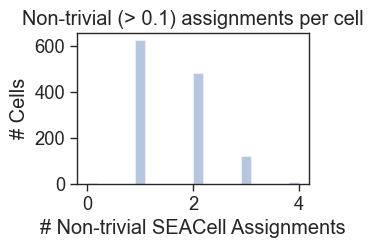

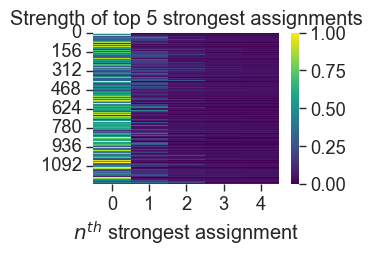

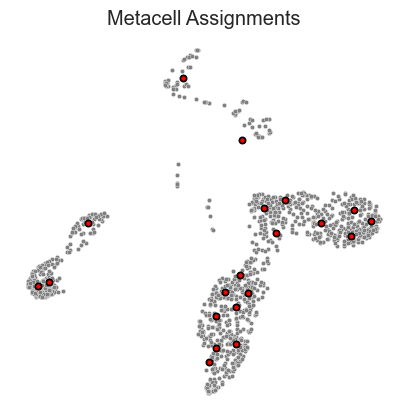

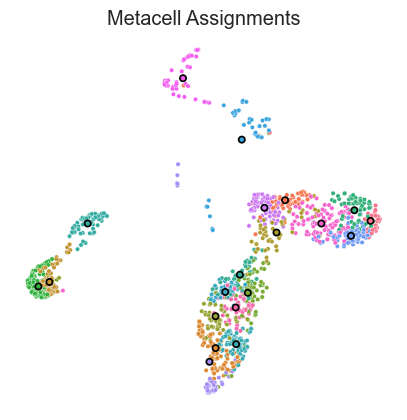

/Users/kevinoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


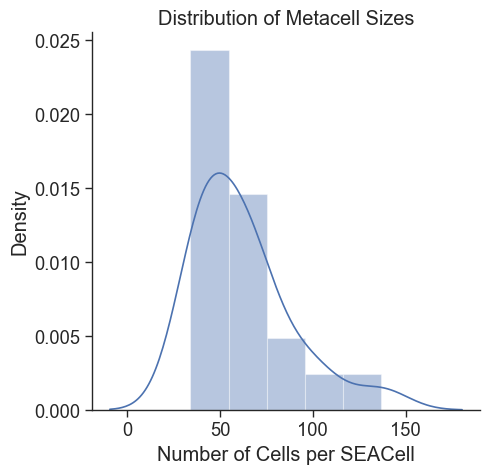

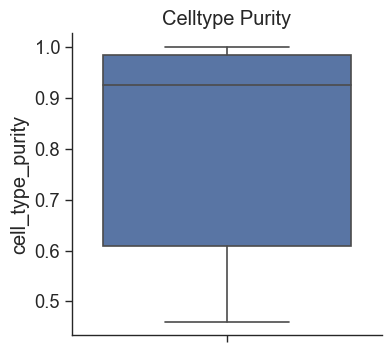

Determing nearest neighbor graph...


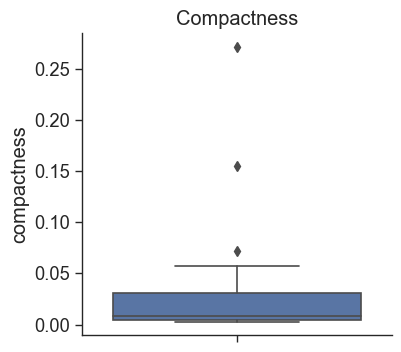

Determing nearest neighbor graph...


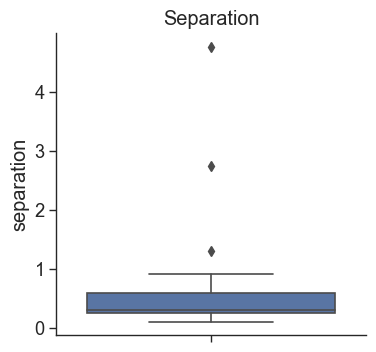

In [4]:
#####individual time points, first we'll do day 3

ad = sc.read_h5ad('/Users/kevinoleary/Documents/Einstein/Zheng Lab/Heart Dev/timecourse.test/covid3.h5ad')

#make sure umap is good and everything is there 

sc.pl.scatter(ad, basis='umap', color='cell_type', frameon=False)

#For d3 1240 cells / 75 cells per metacell = 16.5 metacells, so we'll use 20 (round to nearest 10)

## Core parameters 
n_SEACells = 20
build_kernel_on = 'X_pca' # key in ad.obsm to use for computing metacells
                          # This would be replaced by 'X_svd' for ATAC data

## Additional parameters
n_waypoint_eigs = 10 # Number of eigenvalues to consider when initializing metacells


model = SEACells.core.SEACells(ad, 
                  build_kernel_on=build_kernel_on, 
                  n_SEACells=n_SEACells, 
                  n_waypoint_eigs=n_waypoint_eigs,
                  convergence_epsilon = 1e-5)

model.construct_kernel_matrix()
M = model.kernel_matrix

sns.clustermap(M.toarray()[:500,:500])

# Initialize archetypes
model.initialize_archetypes()

# Plot the initilization to ensure they are spread across phenotypic space
SEACells.plot.plot_initialization(ad, model)

model.fit(min_iter=10, max_iter=100)

# Check for convergence 
model.plot_convergence()


ad.obs[['SEACell']].head() #for hard seacell assignments

plt.figure(figsize=(3,2))
sns.distplot((model.A_.T > 0.1).sum(axis=1), kde=False)
plt.title(f'Non-trivial (> 0.1) assignments per cell')
plt.xlabel('# Non-trivial SEACell Assignments')
plt.ylabel('# Cells')
plt.show()

plt.figure(figsize=(3,2))
b = np.partition(model.A_.T, -5)    
sns.heatmap(np.sort(b[:,-5:])[:, ::-1], cmap='viridis', vmin=0)
plt.title('Strength of top 5 strongest assignments')
plt.xlabel('$n^{th}$ strongest assignment')
plt.show()

labels,weights = model.get_soft_assignments()
labels.head()

SEACells.plot.plot_2D(ad, key='X_umap', colour_metacells=False)

SEACells.plot.plot_2D(ad, key='X_umap', colour_metacells=True)

SEACells.plot.plot_SEACell_sizes(ad, bins=5)

SEACell_purity = SEACells.evaluate.compute_celltype_purity(ad, 'cell_type')

plt.figure(figsize=(4,4))
sns.boxplot(data=SEACell_purity, y='cell_type_purity')
plt.title('Celltype Purity')
sns.despine()
plt.show()
plt.close()

SEACell_purity.head()

compactness = SEACells.evaluate.compactness(ad, 'X_pca')

plt.figure(figsize=(4,4))
sns.boxplot(data=compactness, y='compactness')
plt.title('Compactness')
sns.despine()
plt.show()
plt.close()

compactness.head()

separation = SEACells.evaluate.separation(ad, 'X_pca',nth_nbr=1)

plt.figure(figsize=(4,4))
sns.boxplot(data=separation, y='separation')
plt.title('Separation')
sns.despine()
plt.show()
plt.close()

separation.head()

seacells = ad.obs[['SEACell']]
seacells.to_csv('seacells.d3.cells.csv')

SEACell_purity.to_csv('seacells.d3.celltype.csv')

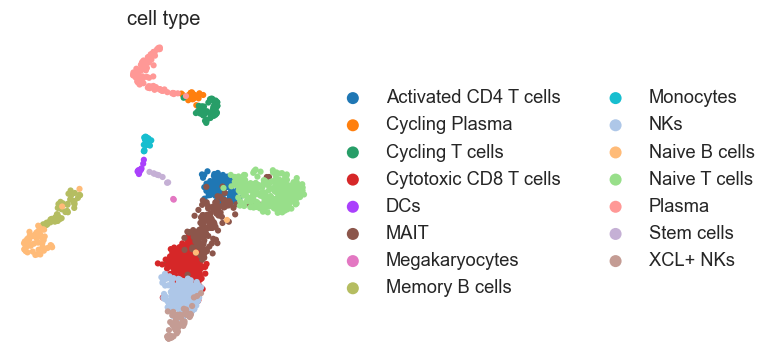

Welcome to SEACells!
Computing kNN graph using scanpy NN ...
Computing radius for adaptive bandwidth kernel...


  0%|          | 0/1512 [00:00<?, ?it/s]

Making graph symmetric...
Parameter graph_construction = union being used to build KNN graph...
Computing RBF kernel...


  0%|          | 0/1512 [00:00<?, ?it/s]

Building similarity LIL matrix...


  0%|          | 0/1512 [00:00<?, ?it/s]

Constructing CSR matrix...


/Users/kevinoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Building kernel on X_pca
Computing diffusion components from X_pca for waypoint initialization ... 
Determing nearest neighbor graph...
Done.
Sampling waypoints ...
Done.
Selecting 18 cells from waypoint initialization.
Initializing residual matrix using greedy column selection
Initializing f and g...


100%|█████████████████████████████████████████| 12/12 [00:00<00:00, 1260.88it/s]

Selecting 2 cells from greedy initialization.


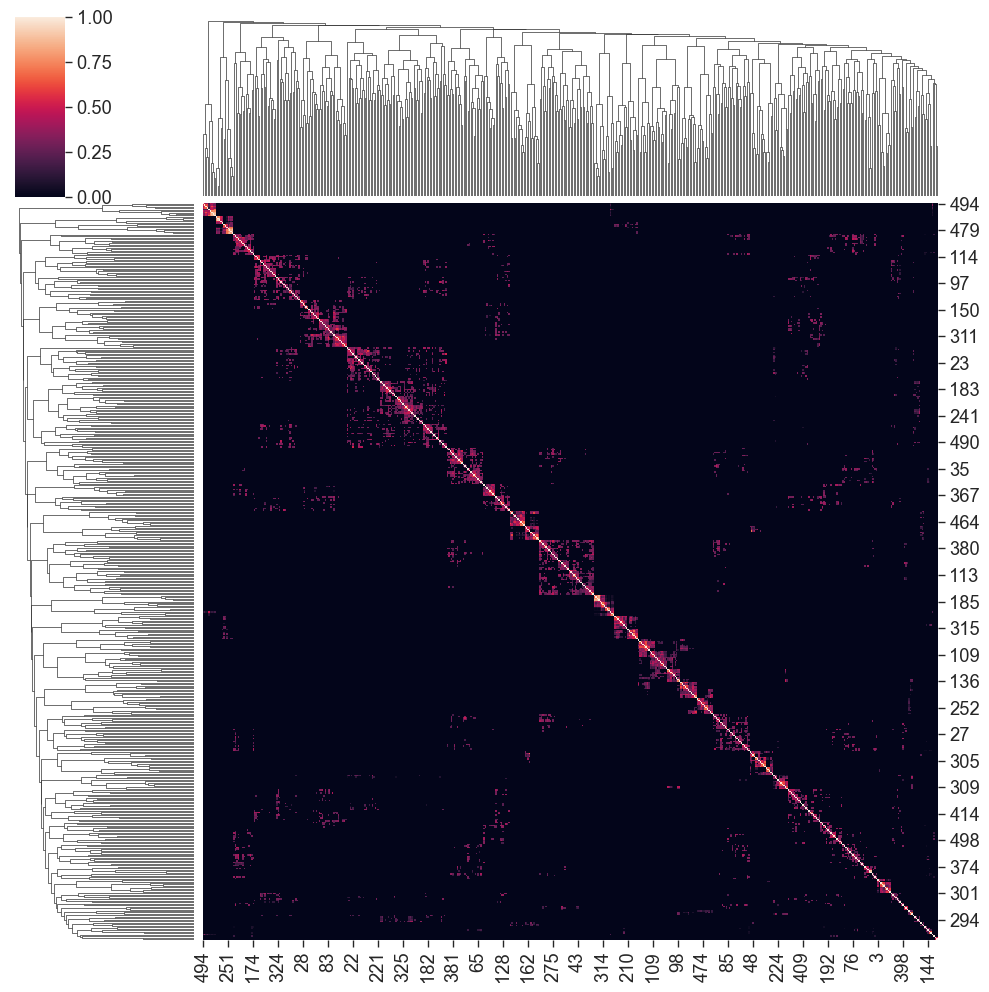

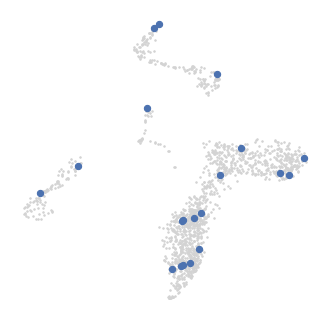

Randomly initialized A matrix.
Setting convergence threshold at 0.00063
Starting iteration 1.
Completed iteration 1.
Starting iteration 10.
Completed iteration 10.
Starting iteration 20.
Completed iteration 20.
Starting iteration 30.
Completed iteration 30.
Converged after 35 iterations.


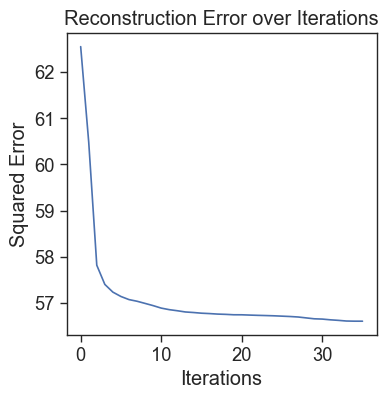

/Users/kevinoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


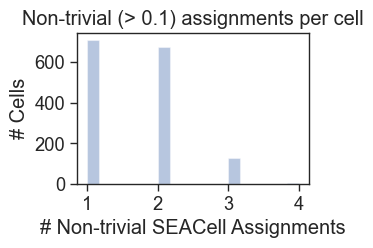

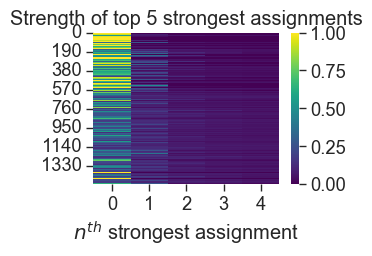

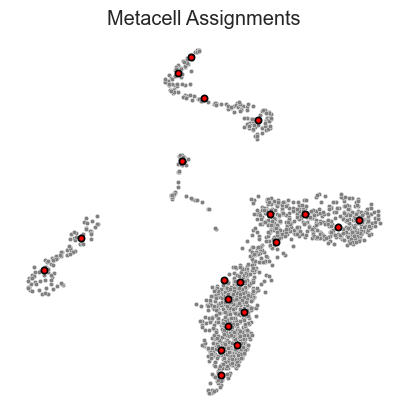

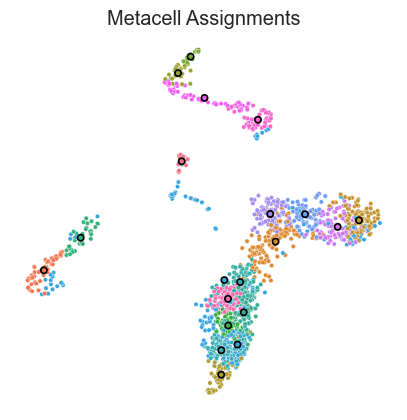

/Users/kevinoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


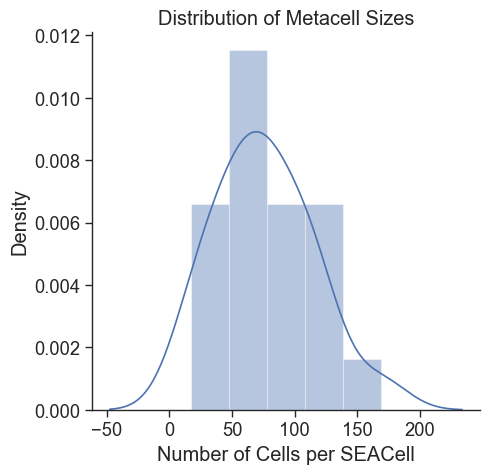

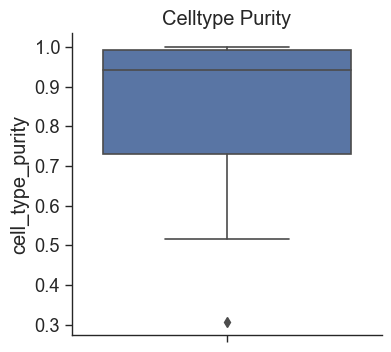

Determing nearest neighbor graph...


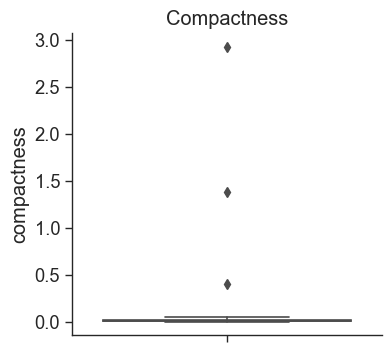

Determing nearest neighbor graph...


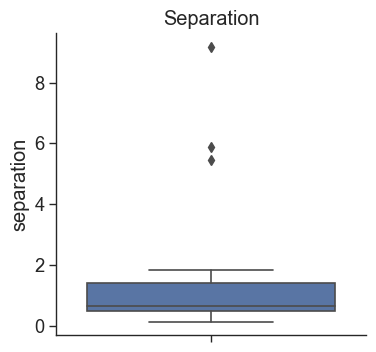

In [6]:
#####individual time points, first we'll do day 7

ad = sc.read_h5ad('/Users/kevinoleary/Documents/Einstein/Zheng Lab/Heart Dev/timecourse.test/covid7.h5ad')

#make sure umap is good and everything is there 

sc.pl.scatter(ad, basis='umap', color='cell_type', frameon=False)

#For d7 1512 cells / 75 cells per metacell = 20.16 metacells, so we'll use 20 (round to nearest 10)

## Core parameters 
n_SEACells = 20
build_kernel_on = 'X_pca' # key in ad.obsm to use for computing metacells
                          # This would be replaced by 'X_svd' for ATAC data

## Additional parameters
n_waypoint_eigs = 10 # Number of eigenvalues to consider when initializing metacells


model = SEACells.core.SEACells(ad, 
                  build_kernel_on=build_kernel_on, 
                  n_SEACells=n_SEACells, 
                  n_waypoint_eigs=n_waypoint_eigs,
                  convergence_epsilon = 1e-5)

model.construct_kernel_matrix()
M = model.kernel_matrix

sns.clustermap(M.toarray()[:500,:500])

# Initialize archetypes
model.initialize_archetypes()

# Plot the initilization to ensure they are spread across phenotypic space
SEACells.plot.plot_initialization(ad, model)

model.fit(min_iter=10, max_iter=100)

# Check for convergence 
model.plot_convergence()


ad.obs[['SEACell']].head() #for hard seacell assignments

plt.figure(figsize=(3,2))
sns.distplot((model.A_.T > 0.1).sum(axis=1), kde=False)
plt.title(f'Non-trivial (> 0.1) assignments per cell')
plt.xlabel('# Non-trivial SEACell Assignments')
plt.ylabel('# Cells')
plt.show()

plt.figure(figsize=(3,2))
b = np.partition(model.A_.T, -5)    
sns.heatmap(np.sort(b[:,-5:])[:, ::-1], cmap='viridis', vmin=0)
plt.title('Strength of top 5 strongest assignments')
plt.xlabel('$n^{th}$ strongest assignment')
plt.show()

labels,weights = model.get_soft_assignments()
labels.head()

SEACells.plot.plot_2D(ad, key='X_umap', colour_metacells=False)

SEACells.plot.plot_2D(ad, key='X_umap', colour_metacells=True)

SEACells.plot.plot_SEACell_sizes(ad, bins=5)

SEACell_purity = SEACells.evaluate.compute_celltype_purity(ad, 'cell_type')

plt.figure(figsize=(4,4))
sns.boxplot(data=SEACell_purity, y='cell_type_purity')
plt.title('Celltype Purity')
sns.despine()
plt.show()
plt.close()

SEACell_purity.head()

compactness = SEACells.evaluate.compactness(ad, 'X_pca')

plt.figure(figsize=(4,4))
sns.boxplot(data=compactness, y='compactness')
plt.title('Compactness')
sns.despine()
plt.show()
plt.close()

compactness.head()

separation = SEACells.evaluate.separation(ad, 'X_pca',nth_nbr=1)

plt.figure(figsize=(4,4))
sns.boxplot(data=separation, y='separation')
plt.title('Separation')
sns.despine()
plt.show()
plt.close()

separation.head()

seacells = ad.obs[['SEACell']]
seacells.to_csv('seacells.d7.cells.csv')

SEACell_purity.to_csv('seacells.d7.celltype.csv')

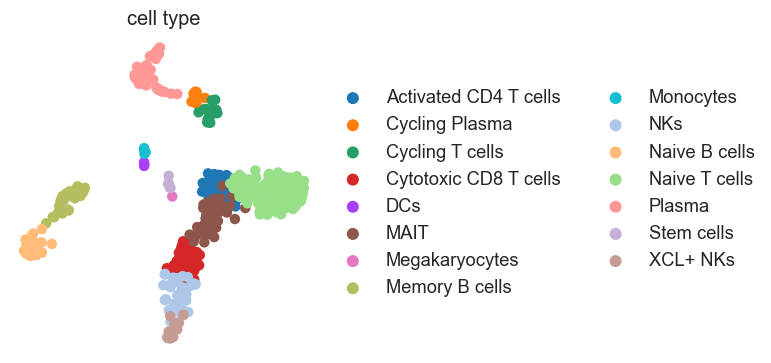

Welcome to SEACells!
Computing kNN graph using scanpy NN ...
Computing radius for adaptive bandwidth kernel...


  0%|          | 0/528 [00:00<?, ?it/s]

Making graph symmetric...
Parameter graph_construction = union being used to build KNN graph...
Computing RBF kernel...


  0%|          | 0/528 [00:00<?, ?it/s]

Building similarity LIL matrix...


  0%|          | 0/528 [00:00<?, ?it/s]

Constructing CSR matrix...


/Users/kevinoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Building kernel on X_pca
Computing diffusion components from X_pca for waypoint initialization ... 
Determing nearest neighbor graph...
Done.
Sampling waypoints ...
Done.
Selecting 9 cells from waypoint initialization.
Initializing residual matrix using greedy column selection
Initializing f and g...


100%|█████████████████████████████████████████| 11/11 [00:00<00:00, 2545.23it/s]

Selecting 1 cells from greedy initialization.


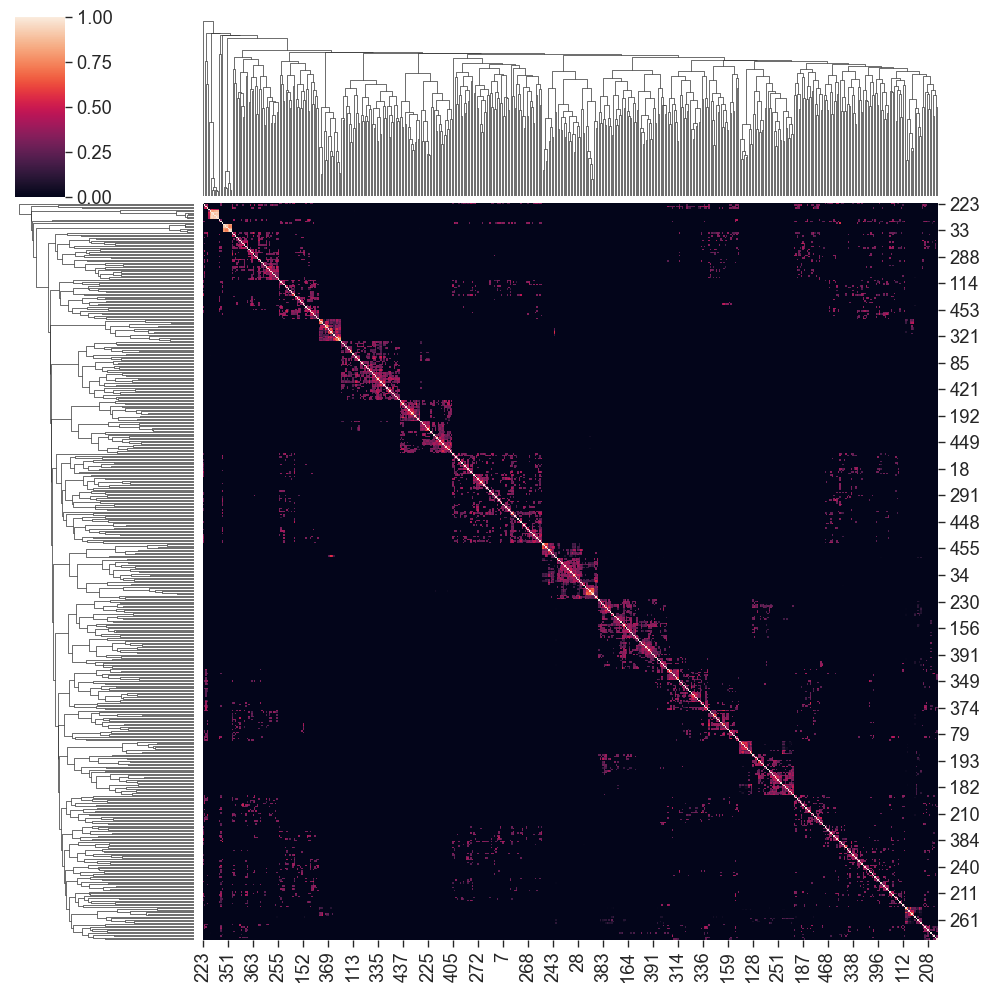

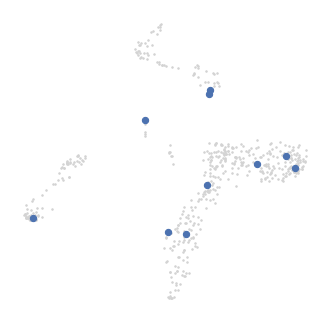

Randomly initialized A matrix.
Setting convergence threshold at 0.00040
Starting iteration 1.
Completed iteration 1.
Starting iteration 10.
Completed iteration 10.
Starting iteration 20.
Completed iteration 20.
Starting iteration 30.
Completed iteration 30.
Converged after 32 iterations.


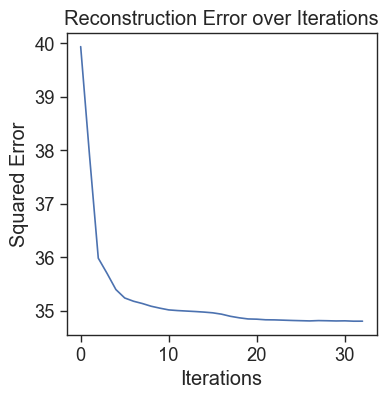

/Users/kevinoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


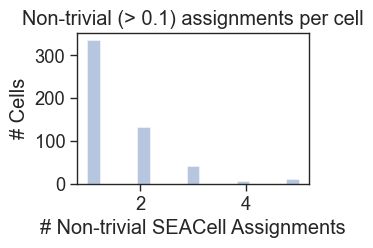

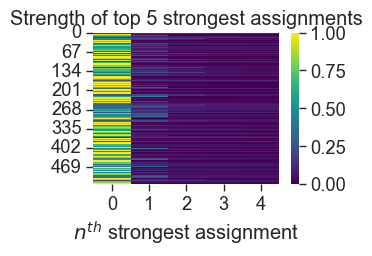

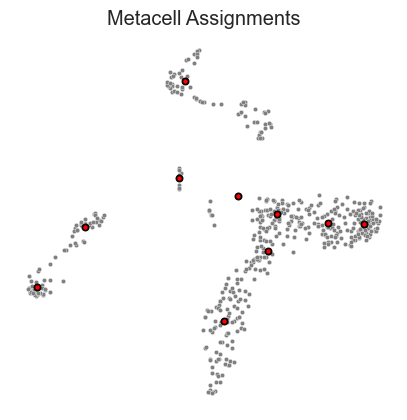

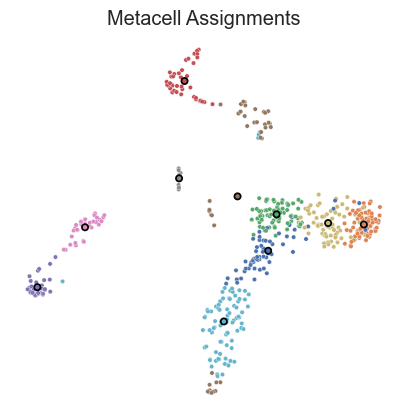

/Users/kevinoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


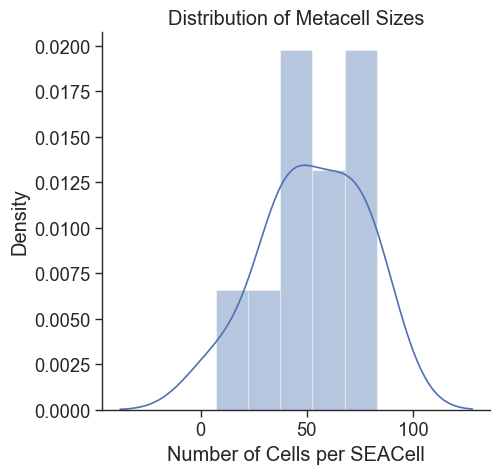

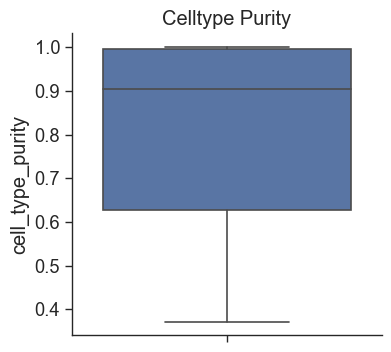

Determing nearest neighbor graph...


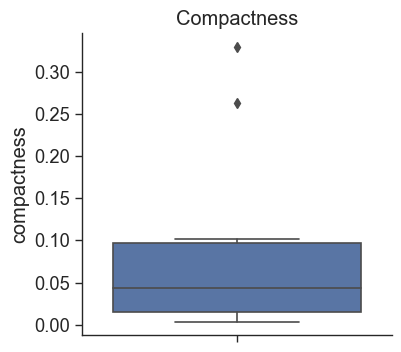

Determing nearest neighbor graph...


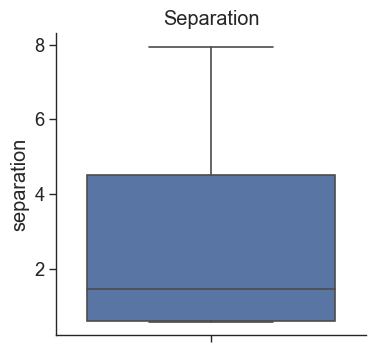

In [10]:
#####individual time points, first we'll do day 9

ad = sc.read_h5ad('/Users/kevinoleary/Documents/Einstein/Zheng Lab/Heart Dev/timecourse.test/covid9.h5ad')

#make sure umap is good and everything is there 

sc.pl.scatter(ad, basis='umap', color='cell_type', frameon=False)

#For d9 528 cells / 75 cells per metacell = 7.04 metacells, so we'll use 10 (round to nearest 10)

## Core parameters 
n_SEACells = 10
build_kernel_on = 'X_pca' # key in ad.obsm to use for computing metacells
                          # This would be replaced by 'X_svd' for ATAC data

## Additional parameters
n_waypoint_eigs = 10 # Number of eigenvalues to consider when initializing metacells


model = SEACells.core.SEACells(ad, 
                  build_kernel_on=build_kernel_on, 
                  n_SEACells=n_SEACells, 
                  n_waypoint_eigs=n_waypoint_eigs,
                  convergence_epsilon = 1e-5)

model.construct_kernel_matrix()
M = model.kernel_matrix

sns.clustermap(M.toarray()[:500,:500])

# Initialize archetypes
model.initialize_archetypes()

# Plot the initilization to ensure they are spread across phenotypic space
SEACells.plot.plot_initialization(ad, model)

model.fit(min_iter=10, max_iter=100)

# Check for convergence 
model.plot_convergence()


ad.obs[['SEACell']].head() #for hard seacell assignments

plt.figure(figsize=(3,2))
sns.distplot((model.A_.T > 0.1).sum(axis=1), kde=False)
plt.title(f'Non-trivial (> 0.1) assignments per cell')
plt.xlabel('# Non-trivial SEACell Assignments')
plt.ylabel('# Cells')
plt.show()

plt.figure(figsize=(3,2))
b = np.partition(model.A_.T, -5)    
sns.heatmap(np.sort(b[:,-5:])[:, ::-1], cmap='viridis', vmin=0)
plt.title('Strength of top 5 strongest assignments')
plt.xlabel('$n^{th}$ strongest assignment')
plt.show()

labels,weights = model.get_soft_assignments()
labels.head()

SEACells.plot.plot_2D(ad, key='X_umap', colour_metacells=False)

SEACells.plot.plot_2D(ad, key='X_umap', colour_metacells=True)

SEACells.plot.plot_SEACell_sizes(ad, bins=5)

SEACell_purity = SEACells.evaluate.compute_celltype_purity(ad, 'cell_type')

plt.figure(figsize=(4,4))
sns.boxplot(data=SEACell_purity, y='cell_type_purity')
plt.title('Celltype Purity')
sns.despine()
plt.show()
plt.close()

SEACell_purity.head()

compactness = SEACells.evaluate.compactness(ad, 'X_pca')

plt.figure(figsize=(4,4))
sns.boxplot(data=compactness, y='compactness')
plt.title('Compactness')
sns.despine()
plt.show()
plt.close()

compactness.head()

separation = SEACells.evaluate.separation(ad, 'X_pca',nth_nbr=1)

plt.figure(figsize=(4,4))
sns.boxplot(data=separation, y='separation')
plt.title('Separation')
sns.despine()
plt.show()
plt.close()

separation.head()

seacells = ad.obs[['SEACell']]
seacells.to_csv('seacells.d9.cells.csv')

SEACell_purity.to_csv('seacells.d9.celltype.csv')

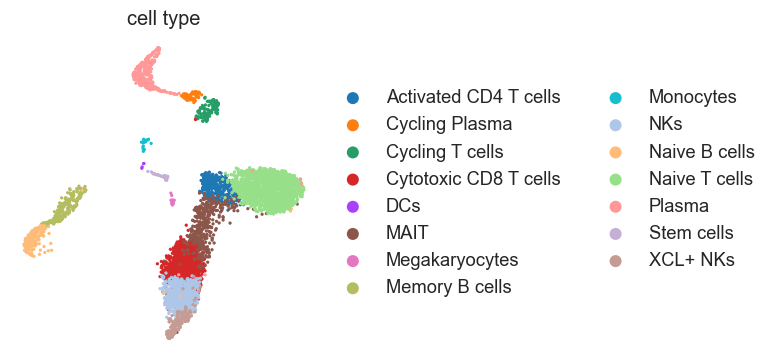

Welcome to SEACells!
Computing kNN graph using scanpy NN ...
Computing radius for adaptive bandwidth kernel...


  0%|          | 0/5433 [00:00<?, ?it/s]

Making graph symmetric...
Parameter graph_construction = union being used to build KNN graph...
Computing RBF kernel...


  0%|          | 0/5433 [00:00<?, ?it/s]

Building similarity LIL matrix...


  0%|          | 0/5433 [00:00<?, ?it/s]

Constructing CSR matrix...


/Users/kevinoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Building kernel on X_pca
Computing diffusion components from X_pca for waypoint initialization ... 
Determing nearest neighbor graph...
Done.
Sampling waypoints ...
Done.
Selecting 58 cells from waypoint initialization.
Initializing residual matrix using greedy column selection
Initializing f and g...


100%|██████████████████████████████████████████| 22/22 [00:00<00:00, 253.21it/s]

Selecting 12 cells from greedy initialization.


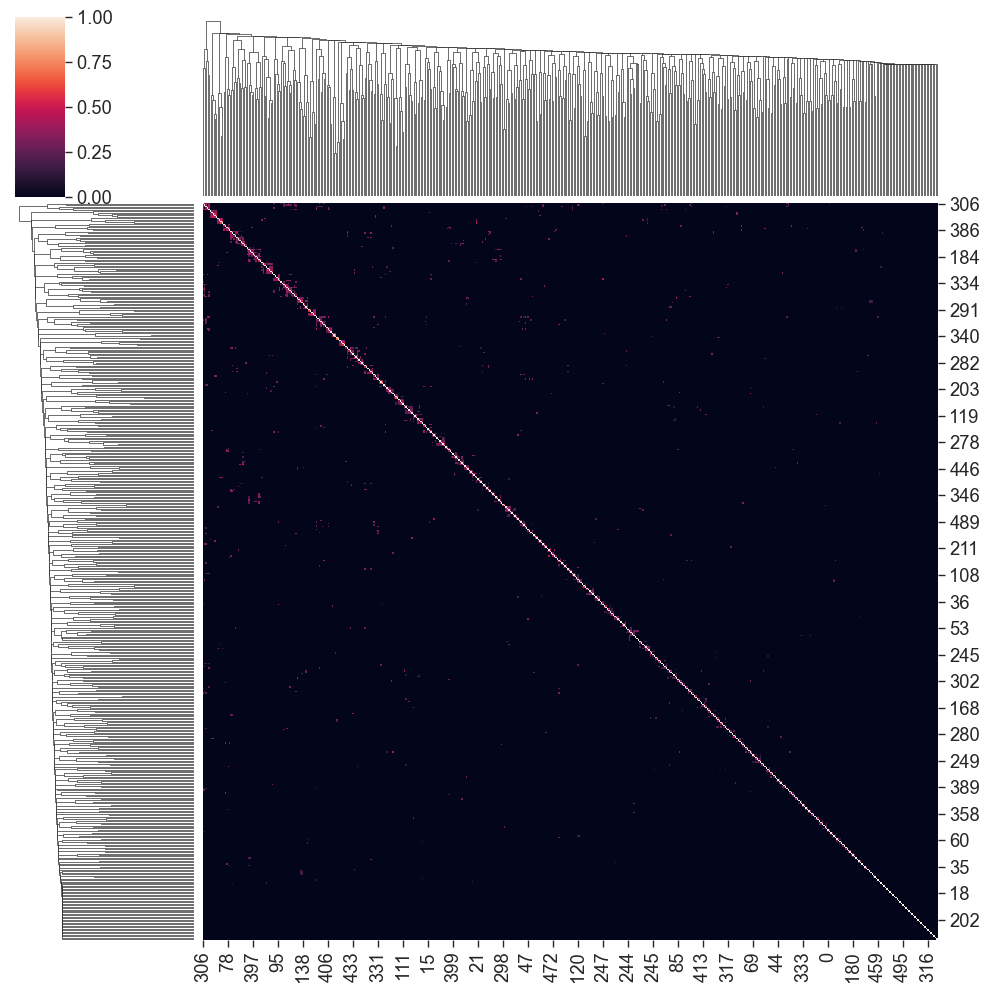

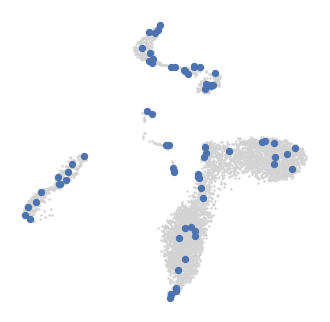

Randomly initialized A matrix.
Setting convergence threshold at 0.00121
Starting iteration 1.
Completed iteration 1.
Starting iteration 10.
Completed iteration 10.
Starting iteration 20.
Completed iteration 20.
Converged after 22 iterations.


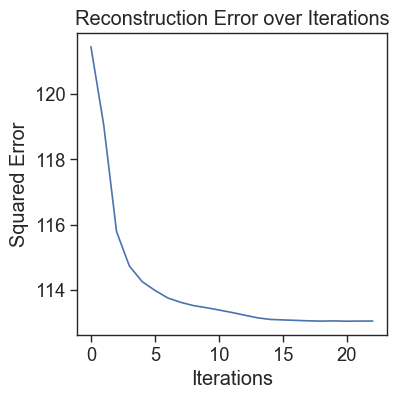

/Users/kevinoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


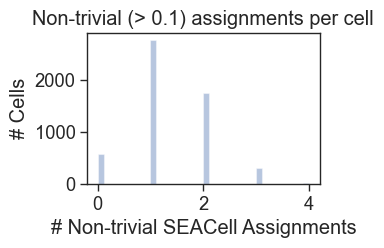

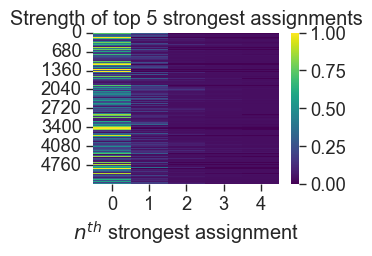

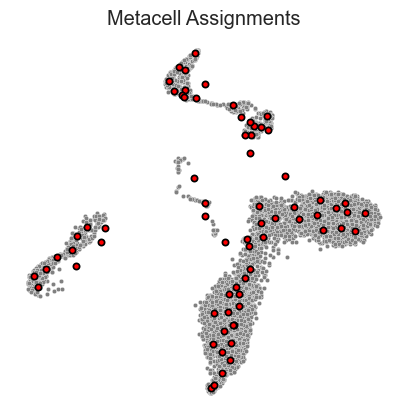

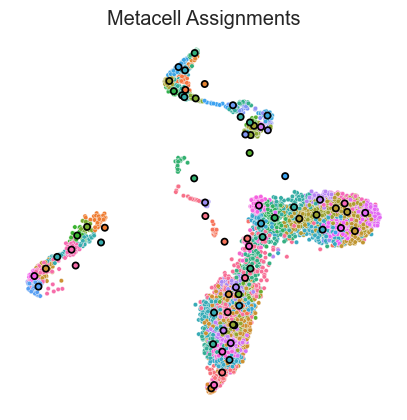

/Users/kevinoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


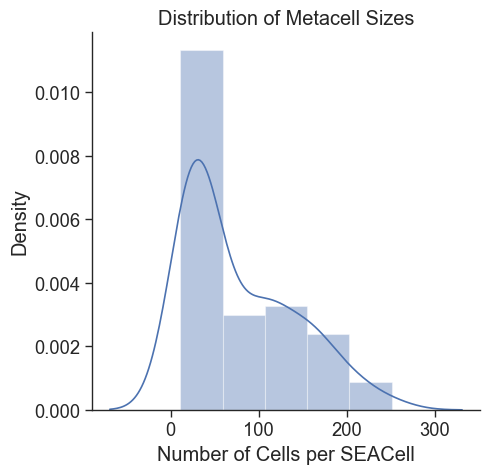

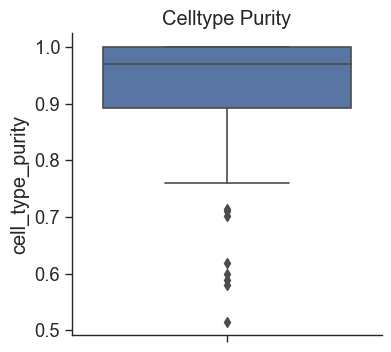

Determing nearest neighbor graph...


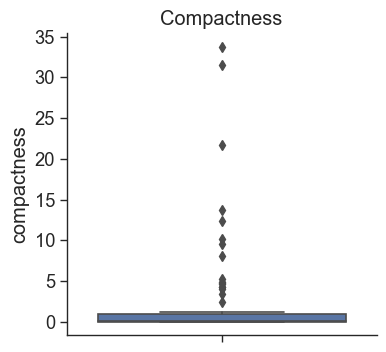

Determing nearest neighbor graph...


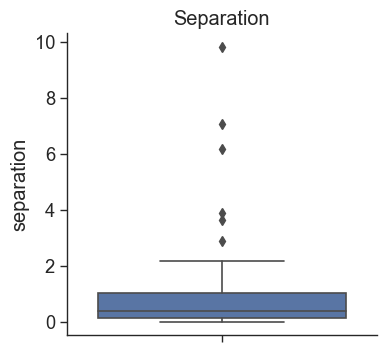

In [12]:
#####day 10

ad = sc.read_h5ad('/Users/kevinoleary/Documents/Einstein/Zheng Lab/Heart Dev/timecourse.test/covid10.h5ad')

#make sure umap is good and everything is there 

sc.pl.scatter(ad, basis='umap', color='cell_type', frameon=False)

#For d10 5433 cells / 75 cells per metacell = 72.44 metacells, so we'll use 70 (round to nearest 10)

## Core parameters 
n_SEACells = 70
build_kernel_on = 'X_pca' # key in ad.obsm to use for computing metacells
                          # This would be replaced by 'X_svd' for ATAC data

## Additional parameters
n_waypoint_eigs = 10 # Number of eigenvalues to consider when initializing metacells


model = SEACells.core.SEACells(ad, 
                  build_kernel_on=build_kernel_on, 
                  n_SEACells=n_SEACells, 
                  n_waypoint_eigs=n_waypoint_eigs,
                  convergence_epsilon = 1e-5)

model.construct_kernel_matrix()
M = model.kernel_matrix

sns.clustermap(M.toarray()[:500,:500])

# Initialize archetypes
model.initialize_archetypes()

# Plot the initilization to ensure they are spread across phenotypic space
SEACells.plot.plot_initialization(ad, model)

model.fit(min_iter=10, max_iter=100)

# Check for convergence 
model.plot_convergence()


ad.obs[['SEACell']].head() #for hard seacell assignments

plt.figure(figsize=(3,2))
sns.distplot((model.A_.T > 0.1).sum(axis=1), kde=False)
plt.title(f'Non-trivial (> 0.1) assignments per cell')
plt.xlabel('# Non-trivial SEACell Assignments')
plt.ylabel('# Cells')
plt.show()

plt.figure(figsize=(3,2))
b = np.partition(model.A_.T, -5)    
sns.heatmap(np.sort(b[:,-5:])[:, ::-1], cmap='viridis', vmin=0)
plt.title('Strength of top 5 strongest assignments')
plt.xlabel('$n^{th}$ strongest assignment')
plt.show()

labels,weights = model.get_soft_assignments()
labels.head()

SEACells.plot.plot_2D(ad, key='X_umap', colour_metacells=False)

SEACells.plot.plot_2D(ad, key='X_umap', colour_metacells=True)

SEACells.plot.plot_SEACell_sizes(ad, bins=5)

SEACell_purity = SEACells.evaluate.compute_celltype_purity(ad, 'cell_type')

plt.figure(figsize=(4,4))
sns.boxplot(data=SEACell_purity, y='cell_type_purity')
plt.title('Celltype Purity')
sns.despine()
plt.show()
plt.close()

SEACell_purity.head()

compactness = SEACells.evaluate.compactness(ad, 'X_pca')

plt.figure(figsize=(4,4))
sns.boxplot(data=compactness, y='compactness')
plt.title('Compactness')
sns.despine()
plt.show()
plt.close()

compactness.head()

separation = SEACells.evaluate.separation(ad, 'X_pca',nth_nbr=1)

plt.figure(figsize=(4,4))
sns.boxplot(data=separation, y='separation')
plt.title('Separation')
sns.despine()
plt.show()
plt.close()

separation.head()

seacells = ad.obs[['SEACell']]
seacells.to_csv('seacells.d10.cells.csv')

SEACell_purity.to_csv('seacells.d10.celltype.csv')

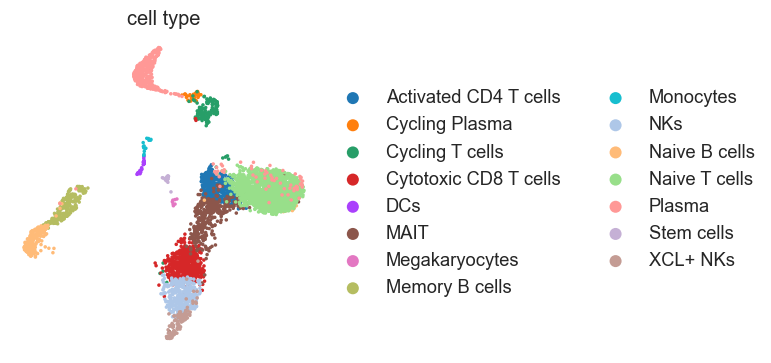

Welcome to SEACells!
Computing kNN graph using scanpy NN ...
Computing radius for adaptive bandwidth kernel...


  0%|          | 0/4627 [00:00<?, ?it/s]

Making graph symmetric...
Parameter graph_construction = union being used to build KNN graph...
Computing RBF kernel...


  0%|          | 0/4627 [00:00<?, ?it/s]

Building similarity LIL matrix...


  0%|          | 0/4627 [00:00<?, ?it/s]

Constructing CSR matrix...


/Users/kevinoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Building kernel on X_pca
Computing diffusion components from X_pca for waypoint initialization ... 
Determing nearest neighbor graph...
Done.
Sampling waypoints ...
Done.
Selecting 47 cells from waypoint initialization.
Initializing residual matrix using greedy column selection
Initializing f and g...


100%|██████████████████████████████████████████| 23/23 [00:00<00:00, 343.23it/s]

Selecting 13 cells from greedy initialization.


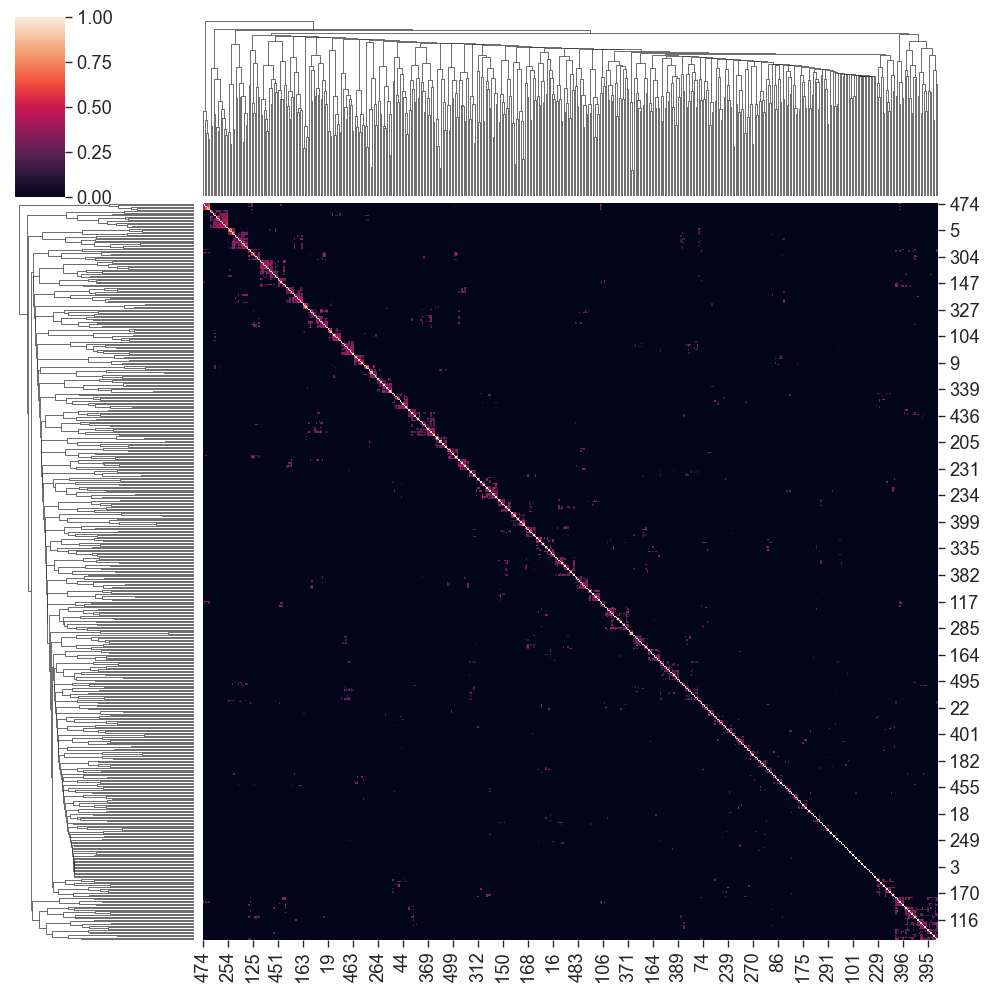

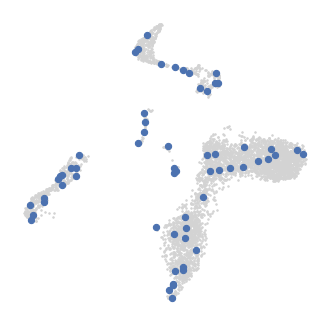

Randomly initialized A matrix.
Setting convergence threshold at 0.00110
Starting iteration 1.
Completed iteration 1.
Starting iteration 10.
Completed iteration 10.
Starting iteration 20.
Completed iteration 20.
Converged after 27 iterations.


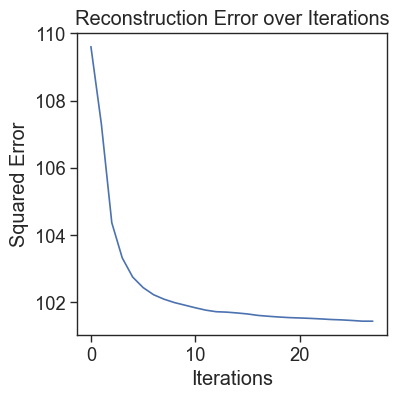

/Users/kevinoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


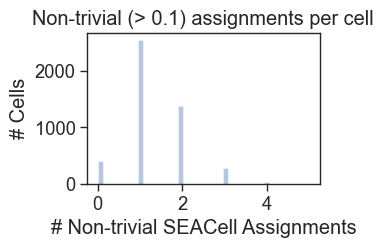

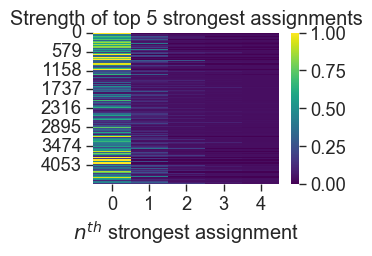

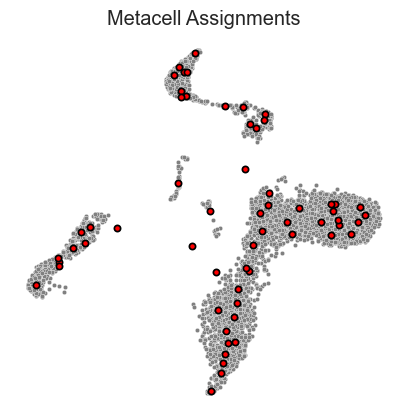

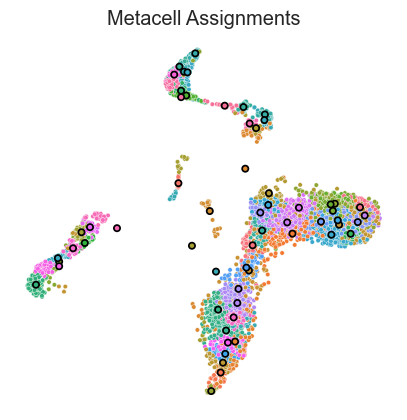

/Users/kevinoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


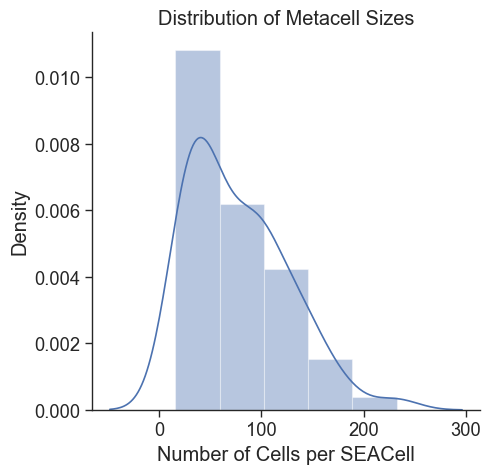

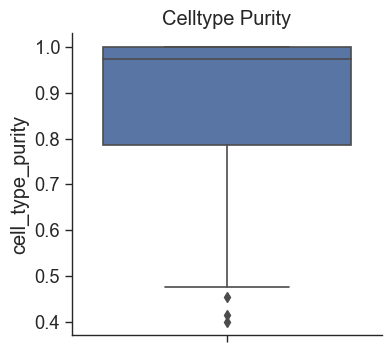

Determing nearest neighbor graph...


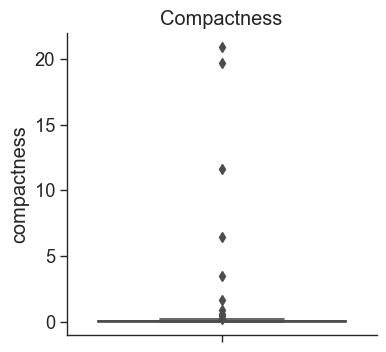

Determing nearest neighbor graph...


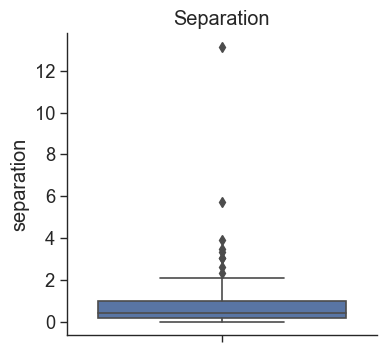

In [13]:
#####day 13

ad = sc.read_h5ad('/Users/kevinoleary/Documents/Einstein/Zheng Lab/Heart Dev/timecourse.test/covid13.h5ad')

#make sure umap is good and everything is there 

sc.pl.scatter(ad, basis='umap', color='cell_type', frameon=False)

#For d13 4627 cells / 75 cells per metacell = 61.69 metacells, so we'll use 60 (round to nearest 10)

## Core parameters 
n_SEACells = 60
build_kernel_on = 'X_pca' # key in ad.obsm to use for computing metacells
                          # This would be replaced by 'X_svd' for ATAC data

## Additional parameters
n_waypoint_eigs = 10 # Number of eigenvalues to consider when initializing metacells


model = SEACells.core.SEACells(ad, 
                  build_kernel_on=build_kernel_on, 
                  n_SEACells=n_SEACells, 
                  n_waypoint_eigs=n_waypoint_eigs,
                  convergence_epsilon = 1e-5)

model.construct_kernel_matrix()
M = model.kernel_matrix

sns.clustermap(M.toarray()[:500,:500])

# Initialize archetypes
model.initialize_archetypes()

# Plot the initilization to ensure they are spread across phenotypic space
SEACells.plot.plot_initialization(ad, model)

model.fit(min_iter=10, max_iter=100)

# Check for convergence 
model.plot_convergence()


ad.obs[['SEACell']].head() #for hard seacell assignments

plt.figure(figsize=(3,2))
sns.distplot((model.A_.T > 0.1).sum(axis=1), kde=False)
plt.title(f'Non-trivial (> 0.1) assignments per cell')
plt.xlabel('# Non-trivial SEACell Assignments')
plt.ylabel('# Cells')
plt.show()

plt.figure(figsize=(3,2))
b = np.partition(model.A_.T, -5)    
sns.heatmap(np.sort(b[:,-5:])[:, ::-1], cmap='viridis', vmin=0)
plt.title('Strength of top 5 strongest assignments')
plt.xlabel('$n^{th}$ strongest assignment')
plt.show()

labels,weights = model.get_soft_assignments()
labels.head()

SEACells.plot.plot_2D(ad, key='X_umap', colour_metacells=False)

SEACells.plot.plot_2D(ad, key='X_umap', colour_metacells=True)

SEACells.plot.plot_SEACell_sizes(ad, bins=5)

SEACell_purity = SEACells.evaluate.compute_celltype_purity(ad, 'cell_type')

plt.figure(figsize=(4,4))
sns.boxplot(data=SEACell_purity, y='cell_type_purity')
plt.title('Celltype Purity')
sns.despine()
plt.show()
plt.close()

SEACell_purity.head()

compactness = SEACells.evaluate.compactness(ad, 'X_pca')

plt.figure(figsize=(4,4))
sns.boxplot(data=compactness, y='compactness')
plt.title('Compactness')
sns.despine()
plt.show()
plt.close()

compactness.head()

separation = SEACells.evaluate.separation(ad, 'X_pca',nth_nbr=1)

plt.figure(figsize=(4,4))
sns.boxplot(data=separation, y='separation')
plt.title('Separation')
sns.despine()
plt.show()
plt.close()

separation.head()

seacells = ad.obs[['SEACell']]
seacells.to_csv('seacells.d13.cells.csv')

SEACell_purity.to_csv('seacells.d13.celltype.csv')

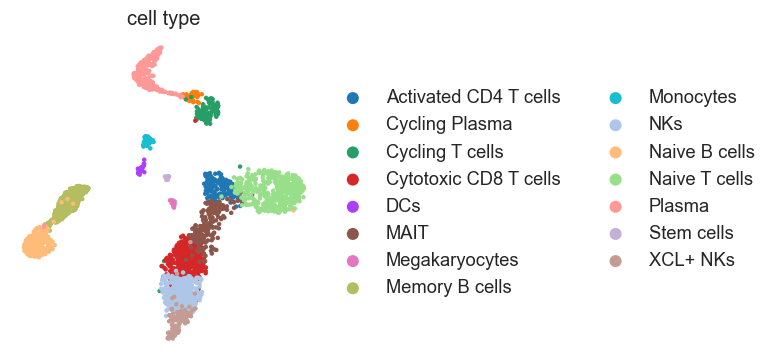

Welcome to SEACells!
Computing kNN graph using scanpy NN ...
Computing radius for adaptive bandwidth kernel...


  0%|          | 0/2877 [00:00<?, ?it/s]

Making graph symmetric...
Parameter graph_construction = union being used to build KNN graph...
Computing RBF kernel...


  0%|          | 0/2877 [00:00<?, ?it/s]

Building similarity LIL matrix...


  0%|          | 0/2877 [00:00<?, ?it/s]

Constructing CSR matrix...


/Users/kevinoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Building kernel on X_pca
Computing diffusion components from X_pca for waypoint initialization ... 
Determing nearest neighbor graph...
Done.
Sampling waypoints ...
Done.
Selecting 32 cells from waypoint initialization.
Initializing residual matrix using greedy column selection
Initializing f and g...


100%|██████████████████████████████████████████| 18/18 [00:00<00:00, 598.31it/s]

Selecting 8 cells from greedy initialization.


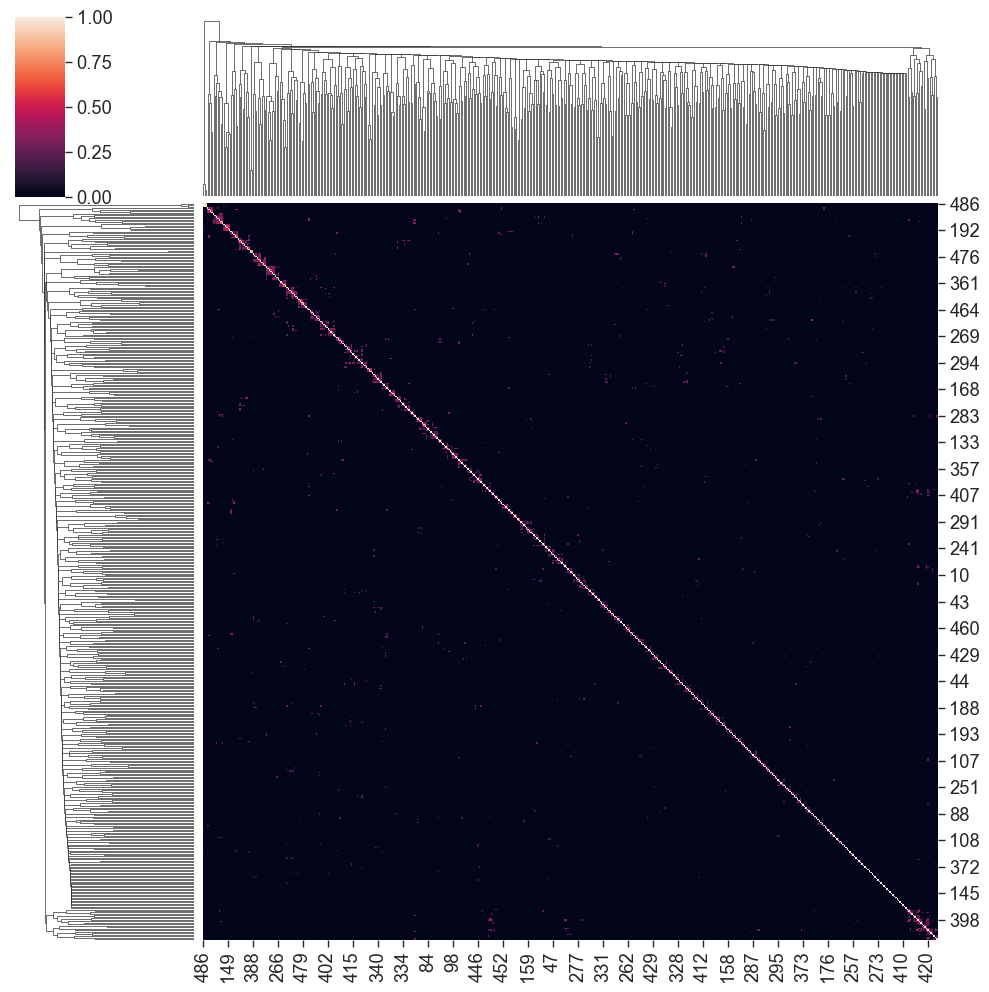

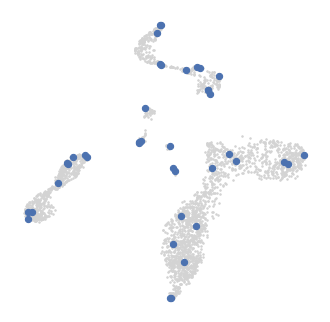

Randomly initialized A matrix.
Setting convergence threshold at 0.00088
Starting iteration 1.
Completed iteration 1.
Starting iteration 10.
Completed iteration 10.
Starting iteration 20.
Completed iteration 20.
Converged after 28 iterations.


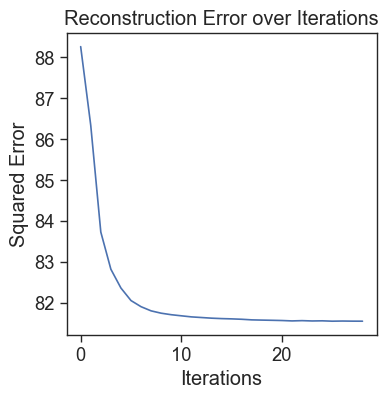

/Users/kevinoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


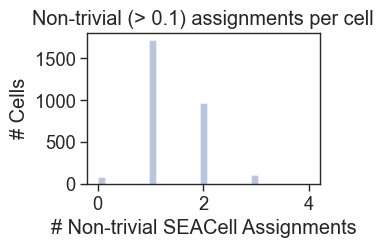

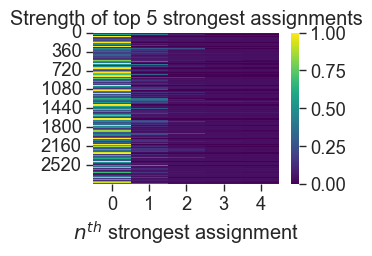

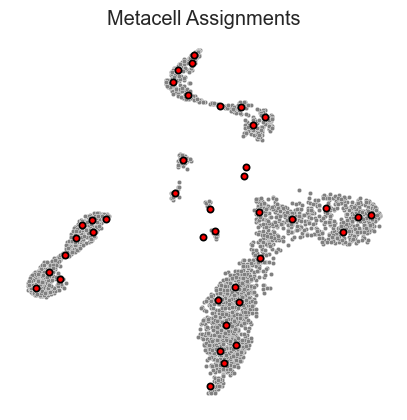

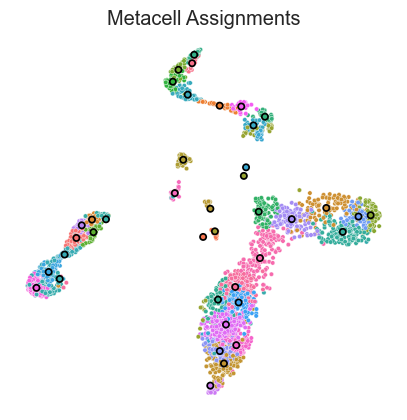

/Users/kevinoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


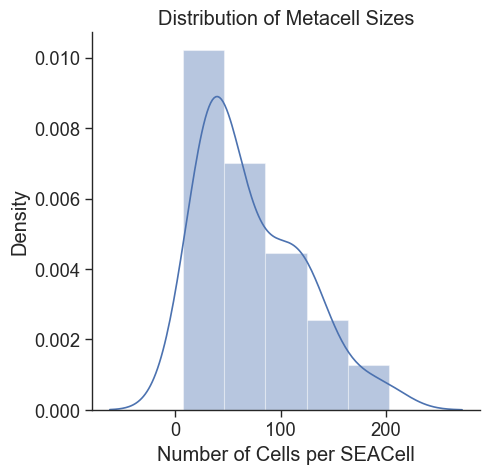

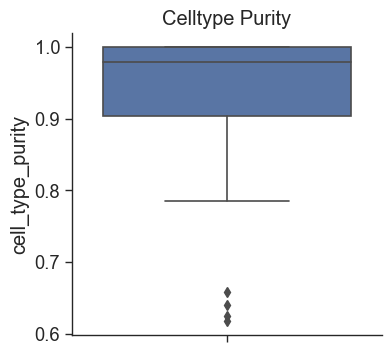

Determing nearest neighbor graph...


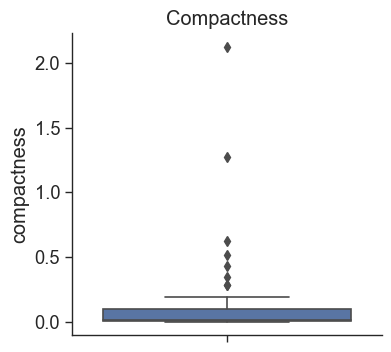

Determing nearest neighbor graph...


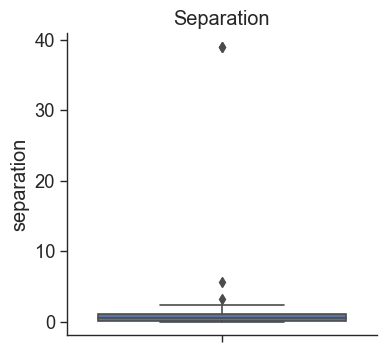

In [14]:
#####day 15

ad = sc.read_h5ad('/Users/kevinoleary/Documents/Einstein/Zheng Lab/Heart Dev/timecourse.test/covid15.h5ad')

#make sure umap is good and everything is there 

sc.pl.scatter(ad, basis='umap', color='cell_type', frameon=False)

#For d15 2877 cells / 75 cells per metacell =38.36 metacells, so we'll use 40 (round to nearest 10)

## Core parameters 
n_SEACells = 40
build_kernel_on = 'X_pca' # key in ad.obsm to use for computing metacells
                          # This would be replaced by 'X_svd' for ATAC data

## Additional parameters
n_waypoint_eigs = 10 # Number of eigenvalues to consider when initializing metacells


model = SEACells.core.SEACells(ad, 
                  build_kernel_on=build_kernel_on, 
                  n_SEACells=n_SEACells, 
                  n_waypoint_eigs=n_waypoint_eigs,
                  convergence_epsilon = 1e-5)

model.construct_kernel_matrix()
M = model.kernel_matrix

sns.clustermap(M.toarray()[:500,:500])

# Initialize archetypes
model.initialize_archetypes()

# Plot the initilization to ensure they are spread across phenotypic space
SEACells.plot.plot_initialization(ad, model)

model.fit(min_iter=10, max_iter=100)

# Check for convergence 
model.plot_convergence()


ad.obs[['SEACell']].head() #for hard seacell assignments

plt.figure(figsize=(3,2))
sns.distplot((model.A_.T > 0.1).sum(axis=1), kde=False)
plt.title(f'Non-trivial (> 0.1) assignments per cell')
plt.xlabel('# Non-trivial SEACell Assignments')
plt.ylabel('# Cells')
plt.show()

plt.figure(figsize=(3,2))
b = np.partition(model.A_.T, -5)    
sns.heatmap(np.sort(b[:,-5:])[:, ::-1], cmap='viridis', vmin=0)
plt.title('Strength of top 5 strongest assignments')
plt.xlabel('$n^{th}$ strongest assignment')
plt.show()

labels,weights = model.get_soft_assignments()
labels.head()

SEACells.plot.plot_2D(ad, key='X_umap', colour_metacells=False)

SEACells.plot.plot_2D(ad, key='X_umap', colour_metacells=True)

SEACells.plot.plot_SEACell_sizes(ad, bins=5)

SEACell_purity = SEACells.evaluate.compute_celltype_purity(ad, 'cell_type')

plt.figure(figsize=(4,4))
sns.boxplot(data=SEACell_purity, y='cell_type_purity')
plt.title('Celltype Purity')
sns.despine()
plt.show()
plt.close()

SEACell_purity.head()

compactness = SEACells.evaluate.compactness(ad, 'X_pca')

plt.figure(figsize=(4,4))
sns.boxplot(data=compactness, y='compactness')
plt.title('Compactness')
sns.despine()
plt.show()
plt.close()

compactness.head()

separation = SEACells.evaluate.separation(ad, 'X_pca',nth_nbr=1)

plt.figure(figsize=(4,4))
sns.boxplot(data=separation, y='separation')
plt.title('Separation')
sns.despine()
plt.show()
plt.close()

separation.head()

seacells = ad.obs[['SEACell']]
seacells.to_csv('seacells.d15.cells.csv')

SEACell_purity.to_csv('seacells.d15.celltype.csv')

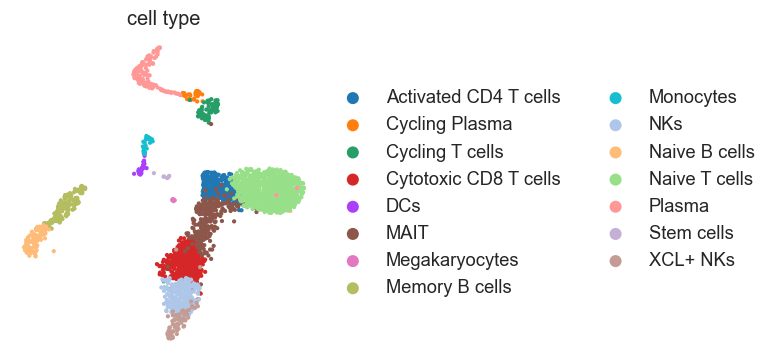

Welcome to SEACells!
Computing kNN graph using scanpy NN ...
Computing radius for adaptive bandwidth kernel...


  0%|          | 0/3267 [00:00<?, ?it/s]

Making graph symmetric...
Parameter graph_construction = union being used to build KNN graph...
Computing RBF kernel...


  0%|          | 0/3267 [00:00<?, ?it/s]

Building similarity LIL matrix...


  0%|          | 0/3267 [00:00<?, ?it/s]

Constructing CSR matrix...


/Users/kevinoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Building kernel on X_pca
Computing diffusion components from X_pca for waypoint initialization ... 
Determing nearest neighbor graph...
Done.
Sampling waypoints ...
Done.
Selecting 32 cells from waypoint initialization.
Initializing residual matrix using greedy column selection
Initializing f and g...


100%|██████████████████████████████████████████| 18/18 [00:00<00:00, 465.57it/s]

Selecting 8 cells from greedy initialization.


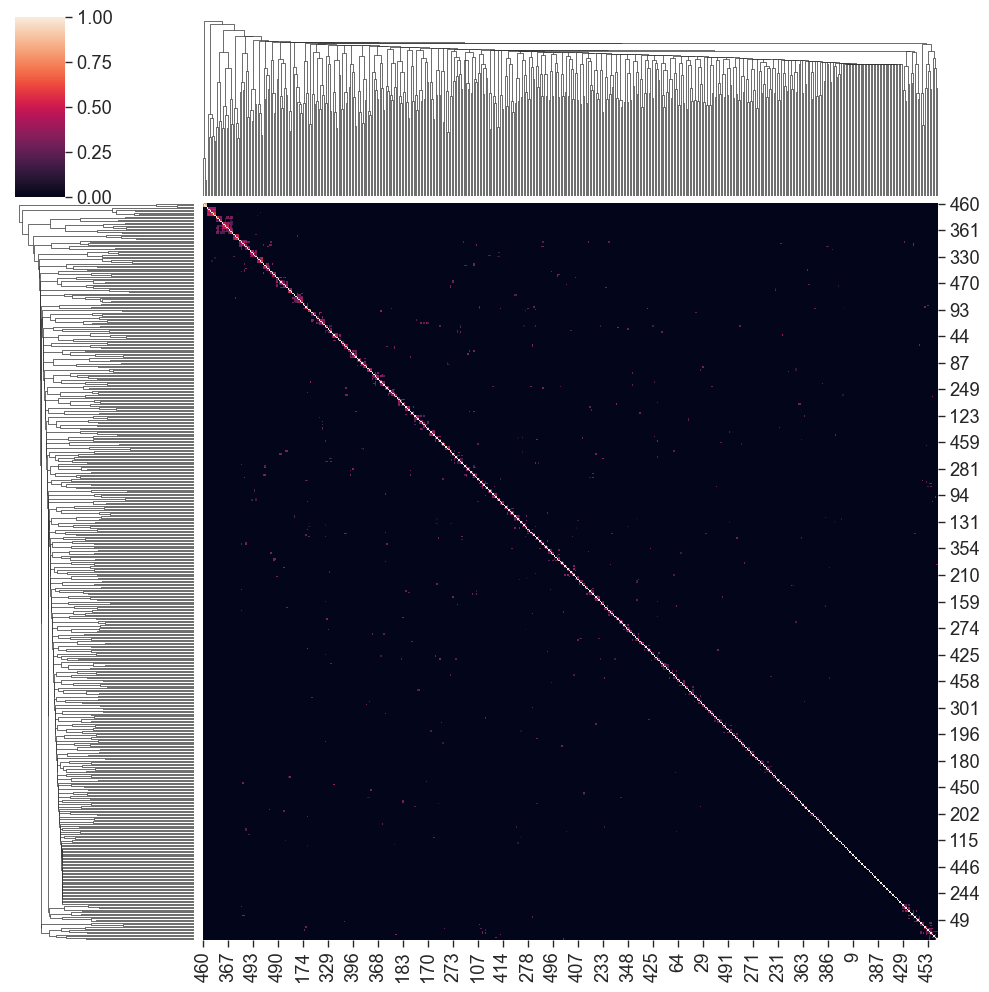

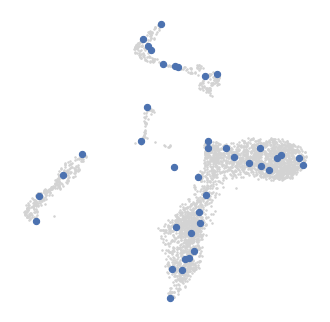

Randomly initialized A matrix.
Setting convergence threshold at 0.00096
Starting iteration 1.
Completed iteration 1.
Starting iteration 10.
Completed iteration 10.
Converged after 19 iterations.


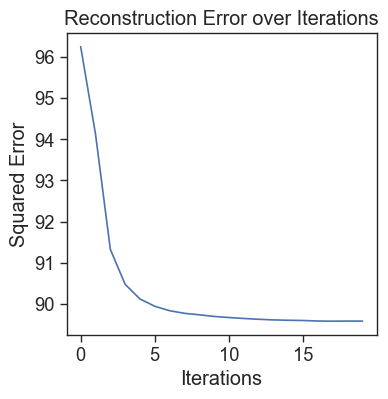

/Users/kevinoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


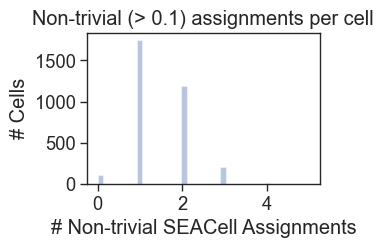

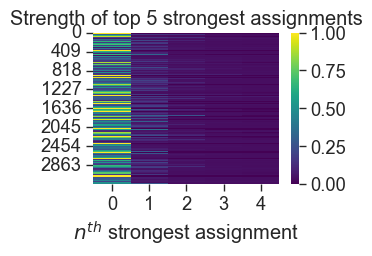

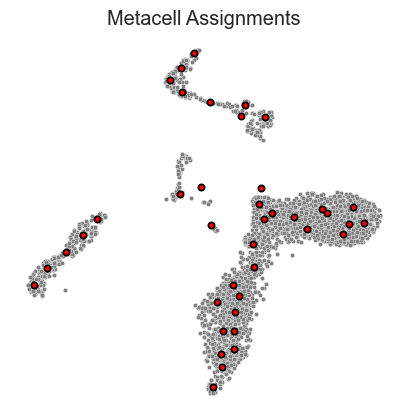

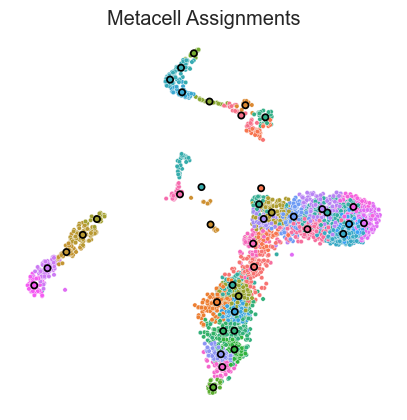

/Users/kevinoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


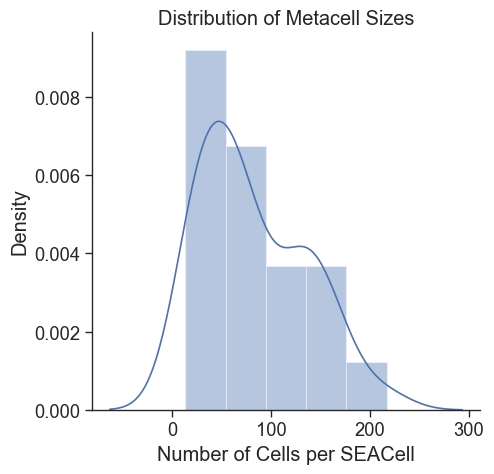

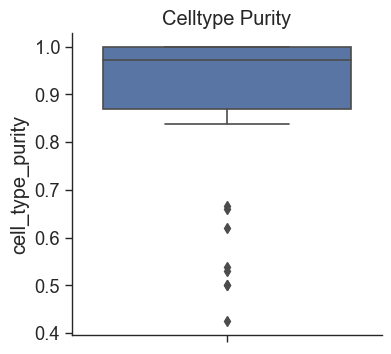

Determing nearest neighbor graph...


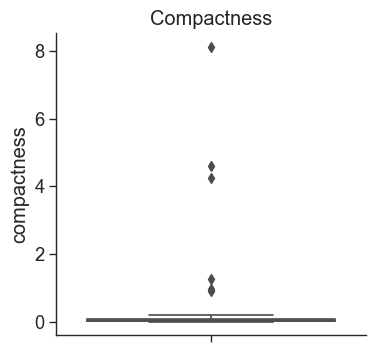

Determing nearest neighbor graph...


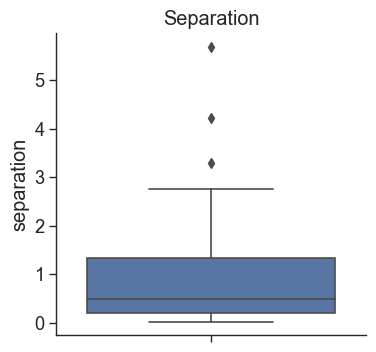

In [15]:
#####day 16

ad = sc.read_h5ad('/Users/kevinoleary/Documents/Einstein/Zheng Lab/Heart Dev/timecourse.test/covid16.h5ad')

#make sure umap is good and everything is there 

sc.pl.scatter(ad, basis='umap', color='cell_type', frameon=False)

#For d16 3267 cells / 75 cells per metacell = 43.56 metacells, so we'll use 40 (round to nearest 10)

## Core parameters 
n_SEACells = 40
build_kernel_on = 'X_pca' # key in ad.obsm to use for computing metacells
                          # This would be replaced by 'X_svd' for ATAC data

## Additional parameters
n_waypoint_eigs = 10 # Number of eigenvalues to consider when initializing metacells


model = SEACells.core.SEACells(ad, 
                  build_kernel_on=build_kernel_on, 
                  n_SEACells=n_SEACells, 
                  n_waypoint_eigs=n_waypoint_eigs,
                  convergence_epsilon = 1e-5)

model.construct_kernel_matrix()
M = model.kernel_matrix

sns.clustermap(M.toarray()[:500,:500])

# Initialize archetypes
model.initialize_archetypes()

# Plot the initilization to ensure they are spread across phenotypic space
SEACells.plot.plot_initialization(ad, model)

model.fit(min_iter=10, max_iter=100)

# Check for convergence 
model.plot_convergence()


ad.obs[['SEACell']].head() #for hard seacell assignments

plt.figure(figsize=(3,2))
sns.distplot((model.A_.T > 0.1).sum(axis=1), kde=False)
plt.title(f'Non-trivial (> 0.1) assignments per cell')
plt.xlabel('# Non-trivial SEACell Assignments')
plt.ylabel('# Cells')
plt.show()

plt.figure(figsize=(3,2))
b = np.partition(model.A_.T, -5)    
sns.heatmap(np.sort(b[:,-5:])[:, ::-1], cmap='viridis', vmin=0)
plt.title('Strength of top 5 strongest assignments')
plt.xlabel('$n^{th}$ strongest assignment')
plt.show()

labels,weights = model.get_soft_assignments()
labels.head()

SEACells.plot.plot_2D(ad, key='X_umap', colour_metacells=False)

SEACells.plot.plot_2D(ad, key='X_umap', colour_metacells=True)

SEACells.plot.plot_SEACell_sizes(ad, bins=5)

SEACell_purity = SEACells.evaluate.compute_celltype_purity(ad, 'cell_type')

plt.figure(figsize=(4,4))
sns.boxplot(data=SEACell_purity, y='cell_type_purity')
plt.title('Celltype Purity')
sns.despine()
plt.show()
plt.close()

SEACell_purity.head()

compactness = SEACells.evaluate.compactness(ad, 'X_pca')

plt.figure(figsize=(4,4))
sns.boxplot(data=compactness, y='compactness')
plt.title('Compactness')
sns.despine()
plt.show()
plt.close()

compactness.head()

separation = SEACells.evaluate.separation(ad, 'X_pca',nth_nbr=1)

plt.figure(figsize=(4,4))
sns.boxplot(data=separation, y='separation')
plt.title('Separation')
sns.despine()
plt.show()
plt.close()

separation.head()

seacells = ad.obs[['SEACell']]
seacells.to_csv('seacells.d16.cells.csv')

SEACell_purity.to_csv('seacells.d16.celltype.csv')

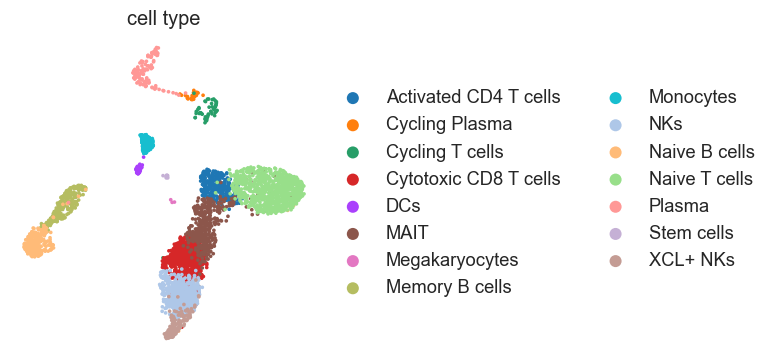

Welcome to SEACells!
Computing kNN graph using scanpy NN ...
Computing radius for adaptive bandwidth kernel...


  0%|          | 0/4272 [00:00<?, ?it/s]

Making graph symmetric...
Parameter graph_construction = union being used to build KNN graph...
Computing RBF kernel...


  0%|          | 0/4272 [00:00<?, ?it/s]

Building similarity LIL matrix...


  0%|          | 0/4272 [00:00<?, ?it/s]

Constructing CSR matrix...


/Users/kevinoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Building kernel on X_pca
Computing diffusion components from X_pca for waypoint initialization ... 
Determing nearest neighbor graph...
Done.
Sampling waypoints ...
Done.
Selecting 48 cells from waypoint initialization.
Initializing residual matrix using greedy column selection
Initializing f and g...


100%|██████████████████████████████████████████| 22/22 [00:00<00:00, 296.60it/s]

Selecting 12 cells from greedy initialization.


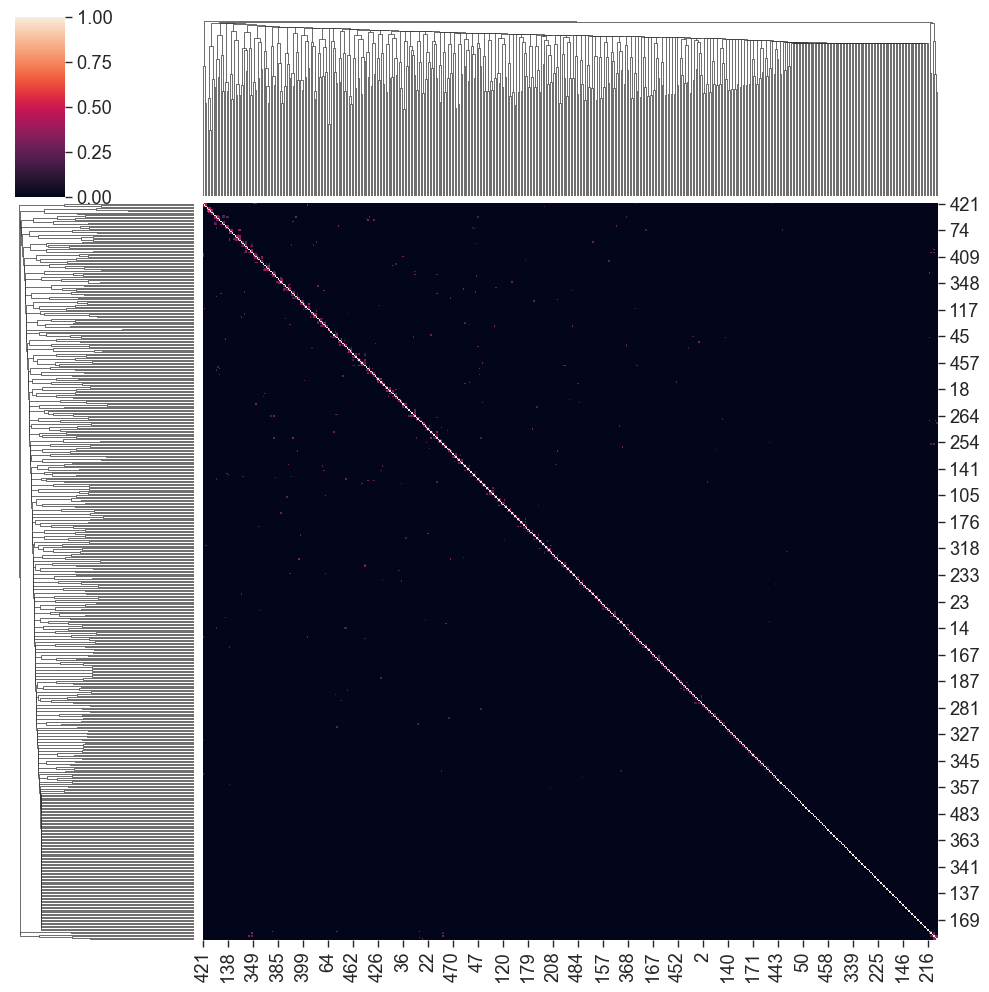

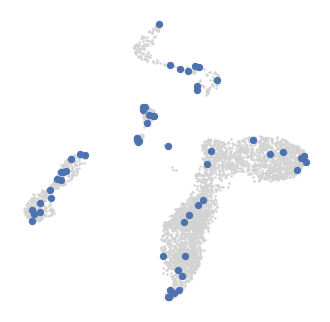

Randomly initialized A matrix.
Setting convergence threshold at 0.00107
Starting iteration 1.
Completed iteration 1.
Starting iteration 10.
Completed iteration 10.
Starting iteration 20.
Completed iteration 20.
Starting iteration 30.
Completed iteration 30.
Converged after 36 iterations.


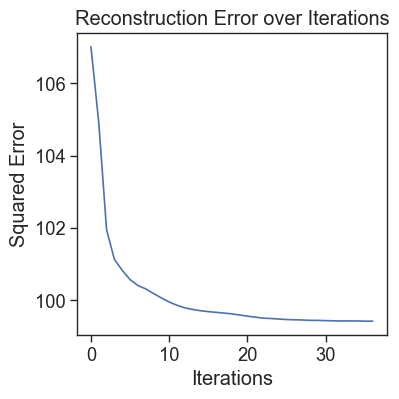

/Users/kevinoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


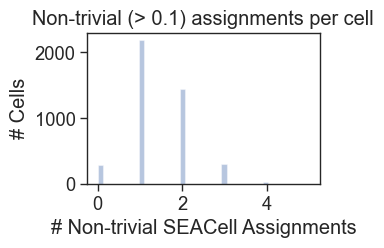

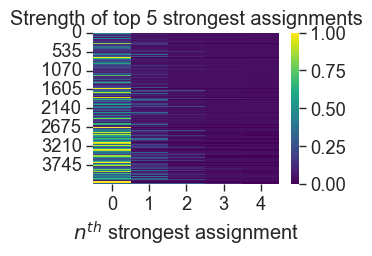

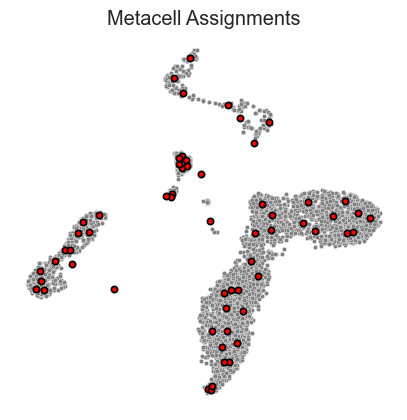

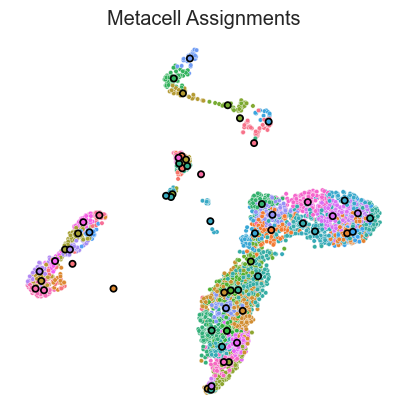

/Users/kevinoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


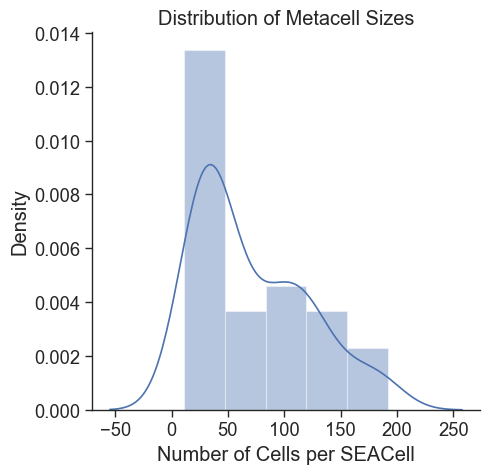

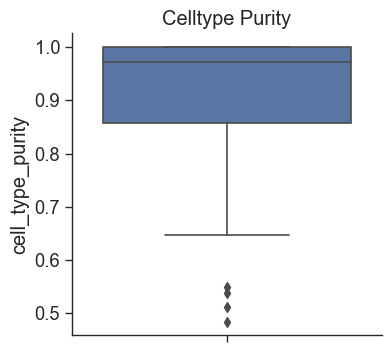

Determing nearest neighbor graph...


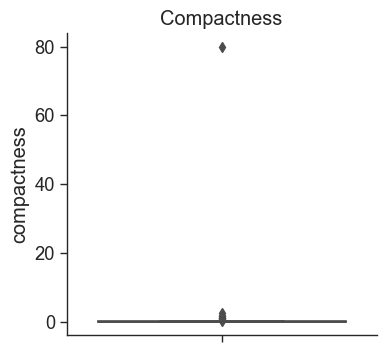

Determing nearest neighbor graph...


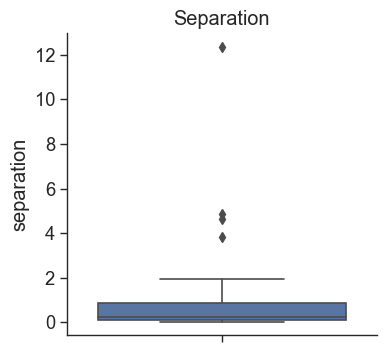

In [17]:
#####day 22

ad = sc.read_h5ad('/Users/kevinoleary/Documents/Einstein/Zheng Lab/Heart Dev/timecourse.test/covid22.h5ad')

#make sure umap is good and everything is there 

sc.pl.scatter(ad, basis='umap', color='cell_type', frameon=False)

#For d22 4272 cells / 75 cells per metacell = 56.96 metacells, so we'll use 60 (round to nearest 10)

## Core parameters 
n_SEACells = 60
build_kernel_on = 'X_pca' # key in ad.obsm to use for computing metacells
                          # This would be replaced by 'X_svd' for ATAC data

## Additional parameters
n_waypoint_eigs = 10 # Number of eigenvalues to consider when initializing metacells


model = SEACells.core.SEACells(ad, 
                  build_kernel_on=build_kernel_on, 
                  n_SEACells=n_SEACells, 
                  n_waypoint_eigs=n_waypoint_eigs,
                  convergence_epsilon = 1e-5)

model.construct_kernel_matrix()
M = model.kernel_matrix

sns.clustermap(M.toarray()[:500,:500])

# Initialize archetypes
model.initialize_archetypes()

# Plot the initilization to ensure they are spread across phenotypic space
SEACells.plot.plot_initialization(ad, model)

model.fit(min_iter=10, max_iter=100)

# Check for convergence 
model.plot_convergence()


ad.obs[['SEACell']].head() #for hard seacell assignments

plt.figure(figsize=(3,2))
sns.distplot((model.A_.T > 0.1).sum(axis=1), kde=False)
plt.title(f'Non-trivial (> 0.1) assignments per cell')
plt.xlabel('# Non-trivial SEACell Assignments')
plt.ylabel('# Cells')
plt.show()

plt.figure(figsize=(3,2))
b = np.partition(model.A_.T, -5)    
sns.heatmap(np.sort(b[:,-5:])[:, ::-1], cmap='viridis', vmin=0)
plt.title('Strength of top 5 strongest assignments')
plt.xlabel('$n^{th}$ strongest assignment')
plt.show()

labels,weights = model.get_soft_assignments()
labels.head()

SEACells.plot.plot_2D(ad, key='X_umap', colour_metacells=False)

SEACells.plot.plot_2D(ad, key='X_umap', colour_metacells=True)

SEACells.plot.plot_SEACell_sizes(ad, bins=5)

SEACell_purity = SEACells.evaluate.compute_celltype_purity(ad, 'cell_type')

plt.figure(figsize=(4,4))
sns.boxplot(data=SEACell_purity, y='cell_type_purity')
plt.title('Celltype Purity')
sns.despine()
plt.show()
plt.close()

SEACell_purity.head()

compactness = SEACells.evaluate.compactness(ad, 'X_pca')

plt.figure(figsize=(4,4))
sns.boxplot(data=compactness, y='compactness')
plt.title('Compactness')
sns.despine()
plt.show()
plt.close()

compactness.head()

separation = SEACells.evaluate.separation(ad, 'X_pca',nth_nbr=1)

plt.figure(figsize=(4,4))
sns.boxplot(data=separation, y='separation')
plt.title('Separation')
sns.despine()
plt.show()
plt.close()

separation.head()

seacells = ad.obs[['SEACell']]
seacells.to_csv('seacells.d22.cells.csv')

SEACell_purity.to_csv('seacells.d22.celltype.csv')

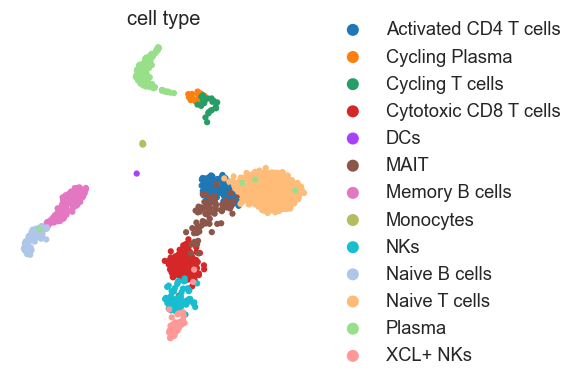

Welcome to SEACells!
Computing kNN graph using scanpy NN ...
Computing radius for adaptive bandwidth kernel...


  0%|          | 0/1488 [00:00<?, ?it/s]

Making graph symmetric...
Parameter graph_construction = union being used to build KNN graph...
Computing RBF kernel...


  0%|          | 0/1488 [00:00<?, ?it/s]

Building similarity LIL matrix...


  0%|          | 0/1488 [00:00<?, ?it/s]

Constructing CSR matrix...


/Users/kevinoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Building kernel on X_pca
Computing diffusion components from X_pca for waypoint initialization ... 
Determing nearest neighbor graph...
Done.
Sampling waypoints ...
Done.
Selecting 16 cells from waypoint initialization.
Initializing residual matrix using greedy column selection
Initializing f and g...


100%|█████████████████████████████████████████| 14/14 [00:00<00:00, 1416.14it/s]

Selecting 4 cells from greedy initialization.


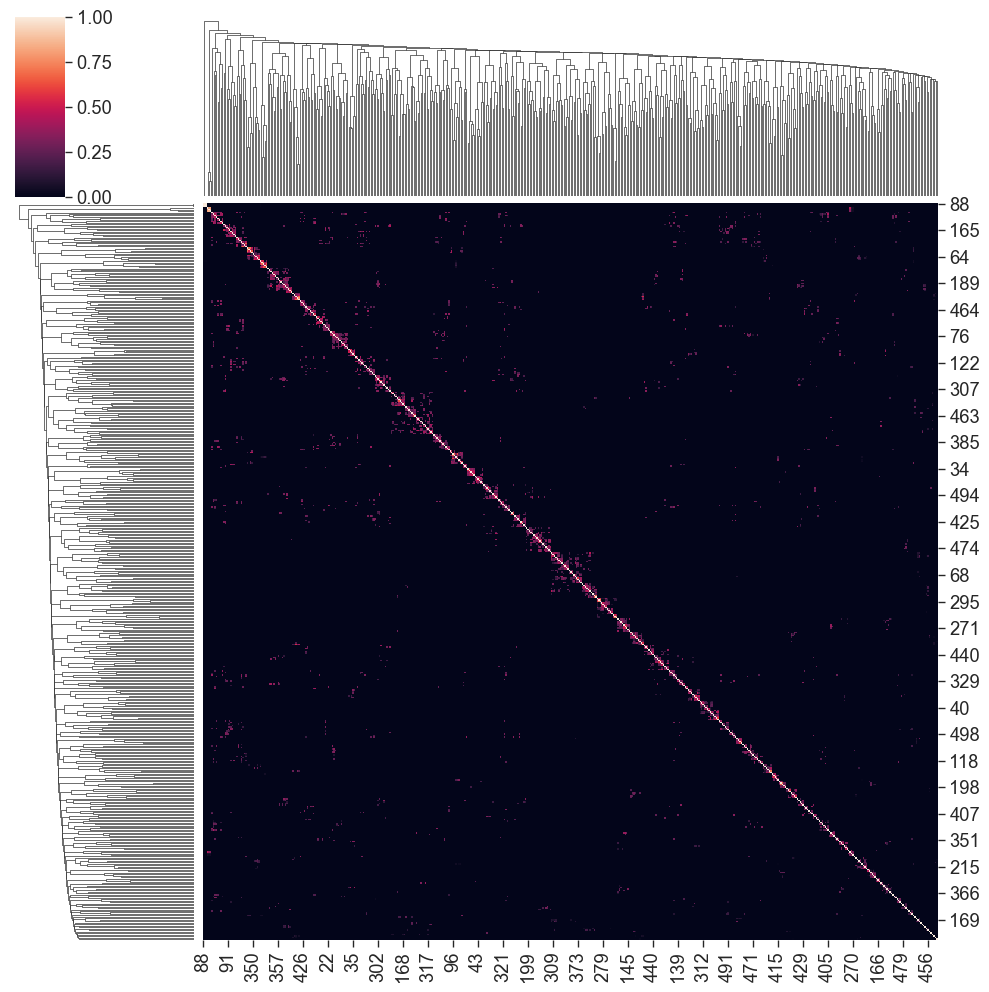

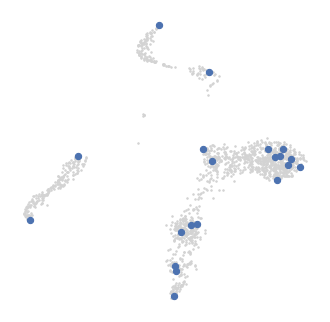

Randomly initialized A matrix.
Setting convergence threshold at 0.00065
Starting iteration 1.
Completed iteration 1.
Starting iteration 10.
Completed iteration 10.
Starting iteration 20.
Completed iteration 20.
Converged after 29 iterations.


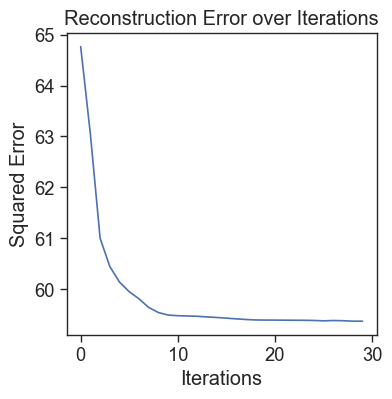

/Users/kevinoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


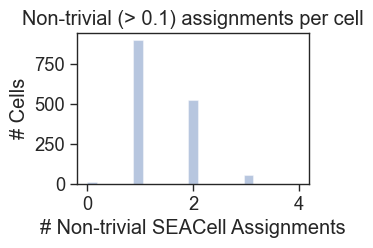

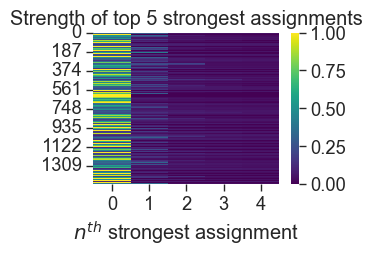

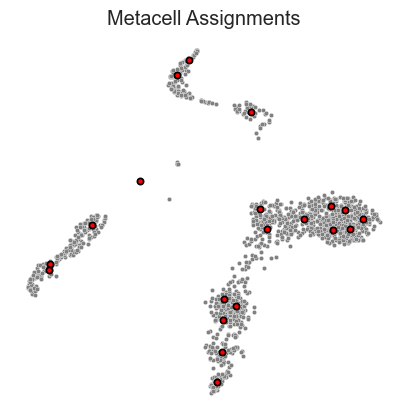

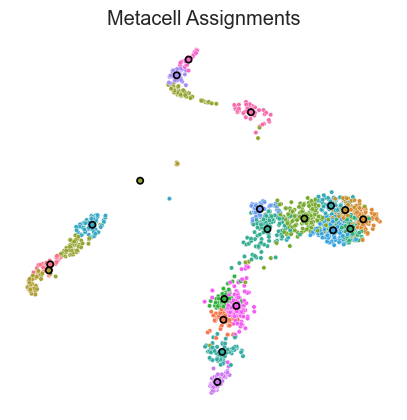

/Users/kevinoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


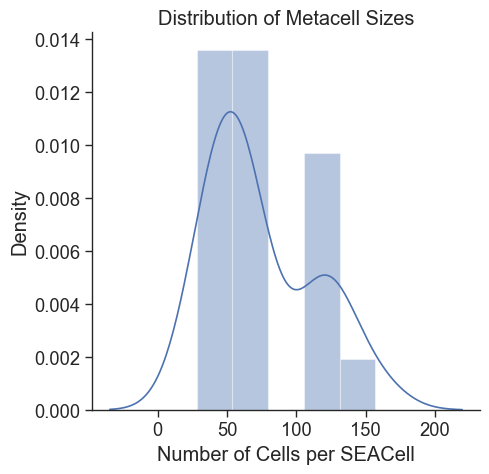

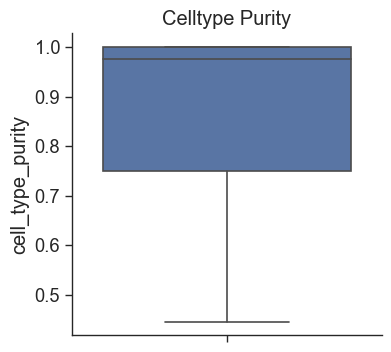

Determing nearest neighbor graph...


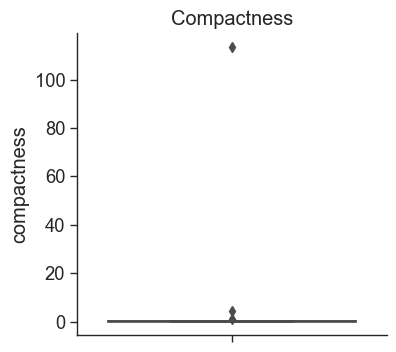

Determing nearest neighbor graph...


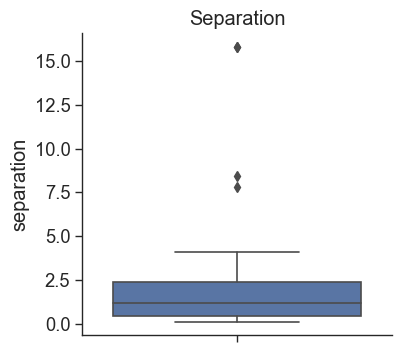

In [18]:
#####day 25

ad = sc.read_h5ad('/Users/kevinoleary/Documents/Einstein/Zheng Lab/Heart Dev/timecourse.test/covid25.h5ad')

#make sure umap is good and everything is there 

sc.pl.scatter(ad, basis='umap', color='cell_type', frameon=False)

#For d25 1488 cells / 75 cells per metacell = 19.84 metacells, so we'll use 20 (round to nearest 10)

## Core parameters 
n_SEACells = 20
build_kernel_on = 'X_pca' # key in ad.obsm to use for computing metacells
                          # This would be replaced by 'X_svd' for ATAC data

## Additional parameters
n_waypoint_eigs = 10 # Number of eigenvalues to consider when initializing metacells


model = SEACells.core.SEACells(ad, 
                  build_kernel_on=build_kernel_on, 
                  n_SEACells=n_SEACells, 
                  n_waypoint_eigs=n_waypoint_eigs,
                  convergence_epsilon = 1e-5)

model.construct_kernel_matrix()
M = model.kernel_matrix

sns.clustermap(M.toarray()[:500,:500])

# Initialize archetypes
model.initialize_archetypes()

# Plot the initilization to ensure they are spread across phenotypic space
SEACells.plot.plot_initialization(ad, model)

model.fit(min_iter=10, max_iter=100)

# Check for convergence 
model.plot_convergence()


ad.obs[['SEACell']].head() #for hard seacell assignments

plt.figure(figsize=(3,2))
sns.distplot((model.A_.T > 0.1).sum(axis=1), kde=False)
plt.title(f'Non-trivial (> 0.1) assignments per cell')
plt.xlabel('# Non-trivial SEACell Assignments')
plt.ylabel('# Cells')
plt.show()

plt.figure(figsize=(3,2))
b = np.partition(model.A_.T, -5)    
sns.heatmap(np.sort(b[:,-5:])[:, ::-1], cmap='viridis', vmin=0)
plt.title('Strength of top 5 strongest assignments')
plt.xlabel('$n^{th}$ strongest assignment')
plt.show()

labels,weights = model.get_soft_assignments()
labels.head()

SEACells.plot.plot_2D(ad, key='X_umap', colour_metacells=False)

SEACells.plot.plot_2D(ad, key='X_umap', colour_metacells=True)

SEACells.plot.plot_SEACell_sizes(ad, bins=5)

SEACell_purity = SEACells.evaluate.compute_celltype_purity(ad, 'cell_type')

plt.figure(figsize=(4,4))
sns.boxplot(data=SEACell_purity, y='cell_type_purity')
plt.title('Celltype Purity')
sns.despine()
plt.show()
plt.close()

SEACell_purity.head()

compactness = SEACells.evaluate.compactness(ad, 'X_pca')

plt.figure(figsize=(4,4))
sns.boxplot(data=compactness, y='compactness')
plt.title('Compactness')
sns.despine()
plt.show()
plt.close()

compactness.head()

separation = SEACells.evaluate.separation(ad, 'X_pca',nth_nbr=1)

plt.figure(figsize=(4,4))
sns.boxplot(data=separation, y='separation')
plt.title('Separation')
sns.despine()
plt.show()
plt.close()

separation.head()

seacells = ad.obs[['SEACell']]
seacells.to_csv('seacells.d25.cells.csv')

SEACell_purity.to_csv('seacells.d25.celltype.csv')

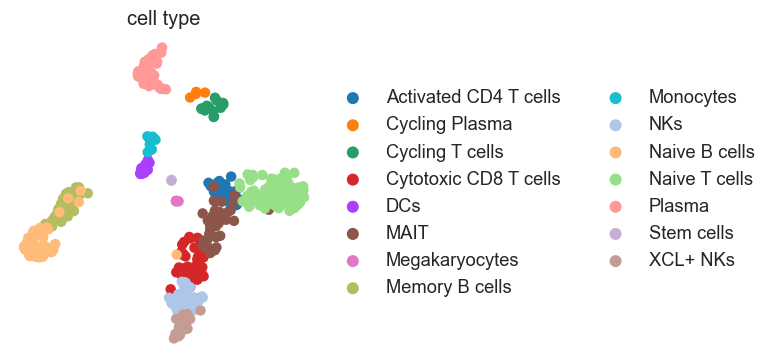

Welcome to SEACells!
Computing kNN graph using scanpy NN ...
Computing radius for adaptive bandwidth kernel...


  0%|          | 0/531 [00:00<?, ?it/s]

Making graph symmetric...
Parameter graph_construction = union being used to build KNN graph...
Computing RBF kernel...


  0%|          | 0/531 [00:00<?, ?it/s]

Building similarity LIL matrix...


  0%|          | 0/531 [00:00<?, ?it/s]

Constructing CSR matrix...


/Users/kevinoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Building kernel on X_pca
Computing diffusion components from X_pca for waypoint initialization ... 
Determing nearest neighbor graph...
Done.
Sampling waypoints ...
Done.
Selecting 16 cells from waypoint initialization.
Initializing residual matrix using greedy column selection
Initializing f and g...


100%|█████████████████████████████████████████| 14/14 [00:00<00:00, 2872.39it/s]

Selecting 4 cells from greedy initialization.


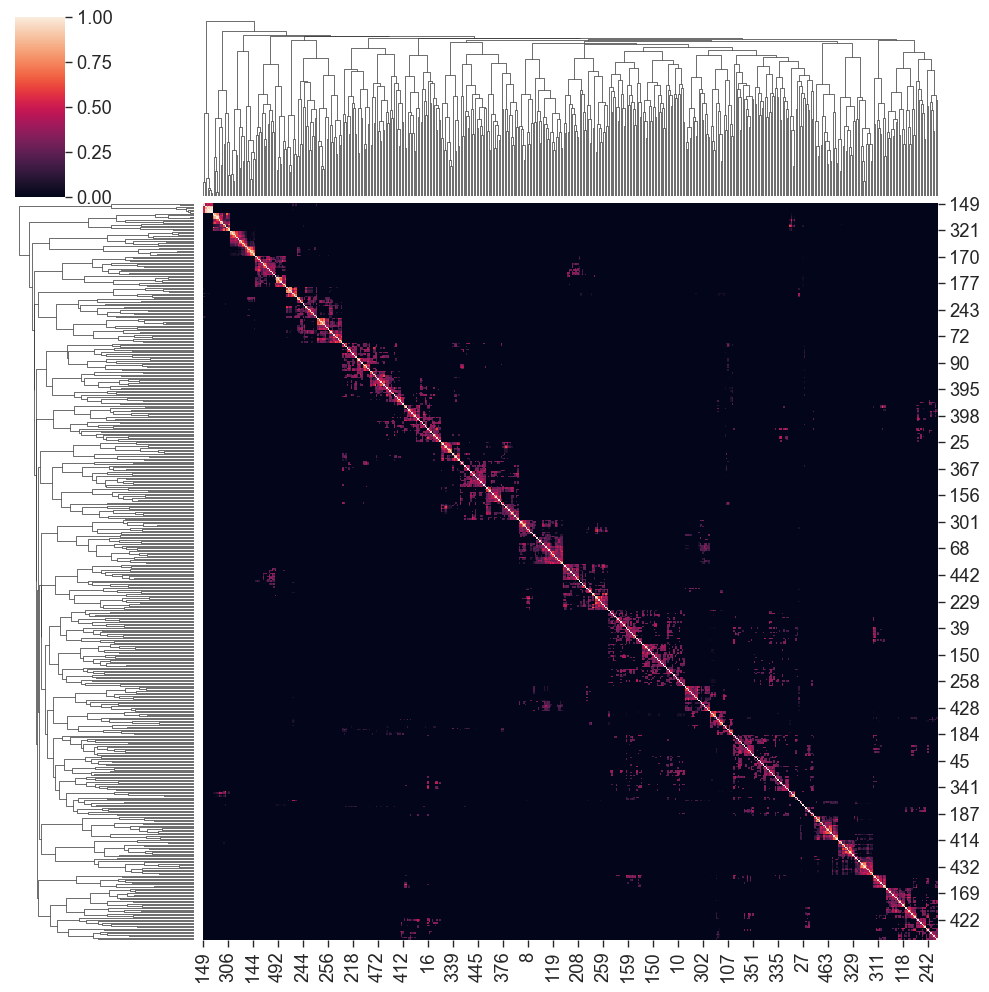

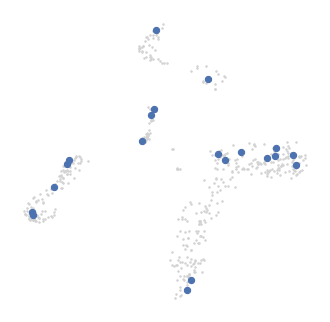

Randomly initialized A matrix.
Setting convergence threshold at 0.00035
Starting iteration 1.
Completed iteration 1.
Starting iteration 10.
Completed iteration 10.
Starting iteration 20.
Completed iteration 20.
Starting iteration 30.
Completed iteration 30.
Starting iteration 40.
Completed iteration 40.
Converged after 41 iterations.


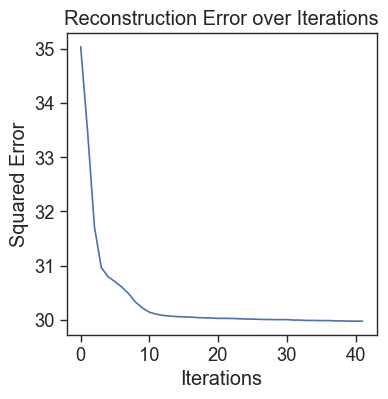

/Users/kevinoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


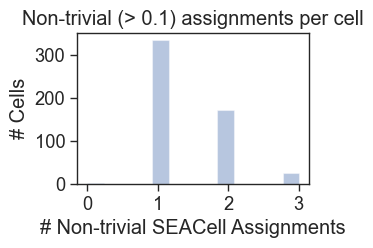

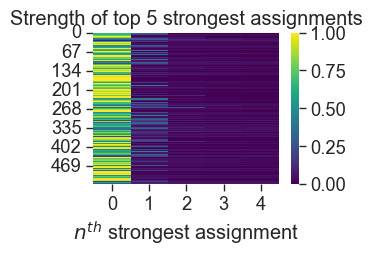

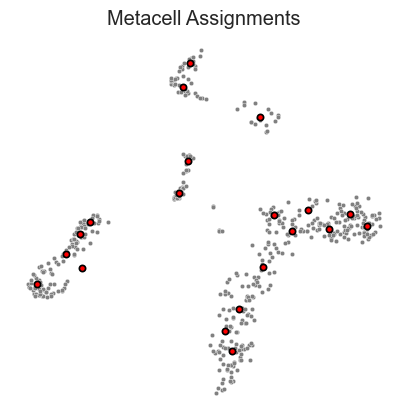

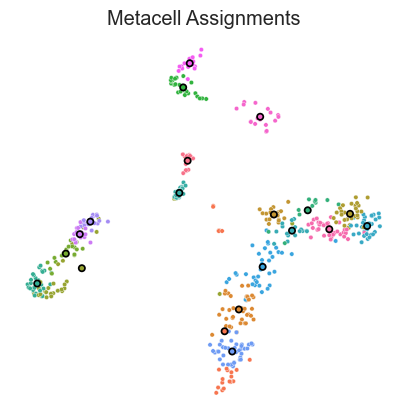

/Users/kevinoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


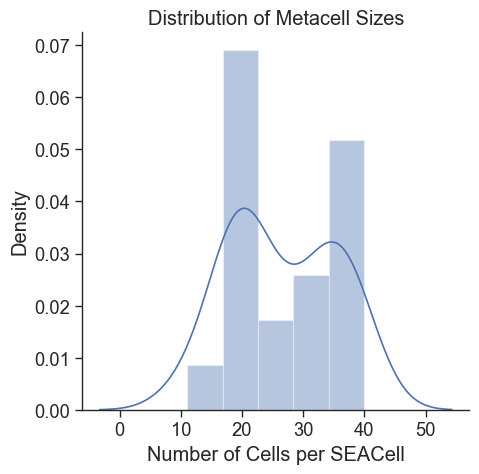

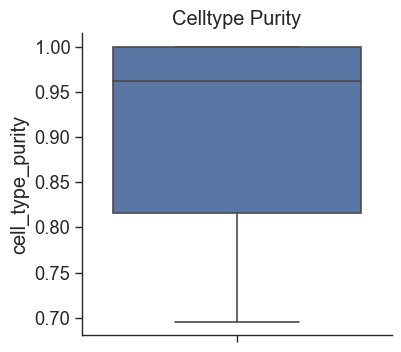

Determing nearest neighbor graph...


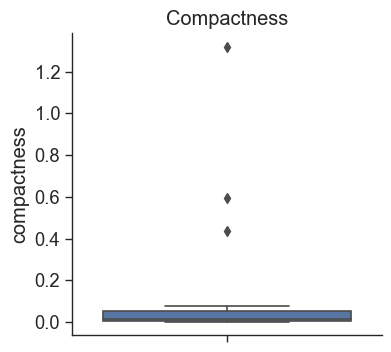

Determing nearest neighbor graph...


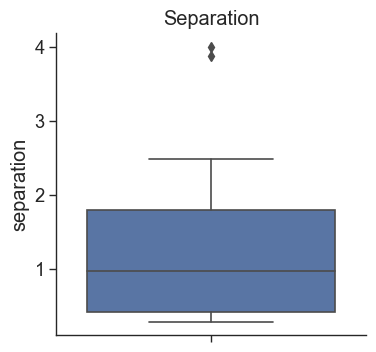

In [19]:
#####day 28

ad = sc.read_h5ad('/Users/kevinoleary/Documents/Einstein/Zheng Lab/Heart Dev/timecourse.test/covid28.h5ad')

#make sure umap is good and everything is there 

sc.pl.scatter(ad, basis='umap', color='cell_type', frameon=False)

#For d28 531 cells / 75 cells per metacell = 7.08 metacells, so we'll use 10 (round to nearest 10)

## Core parameters 
n_SEACells = 20
build_kernel_on = 'X_pca' # key in ad.obsm to use for computing metacells
                          # This would be replaced by 'X_svd' for ATAC data

## Additional parameters
n_waypoint_eigs = 10 # Number of eigenvalues to consider when initializing metacells


model = SEACells.core.SEACells(ad, 
                  build_kernel_on=build_kernel_on, 
                  n_SEACells=n_SEACells, 
                  n_waypoint_eigs=n_waypoint_eigs,
                  convergence_epsilon = 1e-5)

model.construct_kernel_matrix()
M = model.kernel_matrix

sns.clustermap(M.toarray()[:500,:500])

# Initialize archetypes
model.initialize_archetypes()

# Plot the initilization to ensure they are spread across phenotypic space
SEACells.plot.plot_initialization(ad, model)

model.fit(min_iter=10, max_iter=100)

# Check for convergence 
model.plot_convergence()


ad.obs[['SEACell']].head() #for hard seacell assignments

plt.figure(figsize=(3,2))
sns.distplot((model.A_.T > 0.1).sum(axis=1), kde=False)
plt.title(f'Non-trivial (> 0.1) assignments per cell')
plt.xlabel('# Non-trivial SEACell Assignments')
plt.ylabel('# Cells')
plt.show()

plt.figure(figsize=(3,2))
b = np.partition(model.A_.T, -5)    
sns.heatmap(np.sort(b[:,-5:])[:, ::-1], cmap='viridis', vmin=0)
plt.title('Strength of top 5 strongest assignments')
plt.xlabel('$n^{th}$ strongest assignment')
plt.show()

labels,weights = model.get_soft_assignments()
labels.head()

SEACells.plot.plot_2D(ad, key='X_umap', colour_metacells=False)

SEACells.plot.plot_2D(ad, key='X_umap', colour_metacells=True)

SEACells.plot.plot_SEACell_sizes(ad, bins=5)

SEACell_purity = SEACells.evaluate.compute_celltype_purity(ad, 'cell_type')

plt.figure(figsize=(4,4))
sns.boxplot(data=SEACell_purity, y='cell_type_purity')
plt.title('Celltype Purity')
sns.despine()
plt.show()
plt.close()

SEACell_purity.head()

compactness = SEACells.evaluate.compactness(ad, 'X_pca')

plt.figure(figsize=(4,4))
sns.boxplot(data=compactness, y='compactness')
plt.title('Compactness')
sns.despine()
plt.show()
plt.close()

compactness.head()

separation = SEACells.evaluate.separation(ad, 'X_pca',nth_nbr=1)

plt.figure(figsize=(4,4))
sns.boxplot(data=separation, y='separation')
plt.title('Separation')
sns.despine()
plt.show()
plt.close()

separation.head()

seacells = ad.obs[['SEACell']]
seacells.to_csv('seacells.d28.cells.csv')

SEACell_purity.to_csv('seacells.d28.celltype.csv')